In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.decomposition import PCA
import imageio
import random
import time
from itertools import permutations
from matplotlib import animation
from JSAnimation.IPython_display import display_animation
from sklearn.cluster import AgglomerativeClustering
from IPython.display import clear_output
import seaborn as sns; sns.set()
from scipy.stats import entropy
#from sklearn import metrics
#from sklearn.datasets.samples_generator import make_blobs
#from sklearn.preprocessing import StandardScaler
#from skimage import img_as_ubyte
from faker import Faker

In [2]:
def sig_func(x,y):
    
    """Example function with PEP 484 type annotations.

    Args:
        x: The first parameter.
        y: The second parameter.

    Returns:
        The return value.
        
    """
    
    return(1/(1+np.exp(-(np.dot(x,y)))))

In [3]:
def mutate(x,rate):
    
    """Example function with PEP 484 type annotations.

    Args:
        x: The first parameter.
        rate: The second parameter.

    Returns:
        The return value.
        
    """
    
    chosen = np.random.choice(range(0,len(x)),rate,replace=False)
    for i in range(0,len(x)):
        if i in chosen:
            x[i] = 2*np.random.random(1)-1
    return(x)

In [4]:
def intersection(lst1, lst2):
    
    """Example function with PEP 484 type annotations.

    Args:
        lst1: The first parameter.
        lst2: The second parameter.

    Returns:
        The return value.
        
    """
    
    return list(set(lst1) & set(lst2))

In [5]:
def extract_tribe(cells, cell_weights, fake_names, n, labels, node_n = 225):
    
    """Example function with PEP 484 type annotations.

    Args:
        lst1: The first parameter.
        lst2: The second parameter.

    Returns:
        The return value.
        
    """
    
    db = AgglomerativeClustering(n).fit(cell_weights)
    print(db.labels_)
    flags = []
    for k in labels:
        flags = [flags, [j for j, x in enumerate(db.labels_ == k) if x]]
    flags = flags[1:]
    print(flags)
    next_cells = cells[flags,:]  
    next_weights = cell_weights[flags,:]
    next_fake_names = [fake_names[x] for x in flags]
    print(next_fake_names)
    return(next_cells[0], next_weights[0], next_fake_names[0], db)

In [6]:
def fuzzy_logic(a):
    
    """Example function with PEP 484 type annotations.

    Args:
        lst1: The first parameter.
        lst2: The second parameter.

    Returns:
        The return value.
        
    """
    
    less_norm = np.linalg.norm([i for i in a if i <= np.median(a)])
    cutoff = np.min(a)/less_norm + np.random.rand()*((np.median(a)-np.min(a))/less_norm)
    choice = a.index(np.random.choice([i for i in a if i <= cutoff*less_norm]))
    
    return(choice)

In [7]:
def slime(x = [],
          y = [],
          z = [],
          start_pop = 200,
          max_age = 100,
          fig_size = [5,5],
          board_size = 128,
          fertile = 6,
          start_hp = 4,
          log = False,
          frames=500,
          interval=50,
          mutation_rate = 4,
          willing_wait = 5,
          experimental = False,
          mode='once'):
    
    """Example function with PEP 484 type annotations.

    Args:
        lst1: The first parameter.
        lst2: The second parameter.

    Returns:
        The return value.

    """
    
    global sight
    global time_tick
    global grow_count
    global birth_count
    global bump_count
    global trends
    global cells
    global cell_weights
    global baby_name
    global killed
    global border
    global last_time
    global new_coord
    global G
    global for_gif
    global max_hp
    global frame_count
    global fake
    global fake_names
    
    fake = Faker()    
    total_start_time = time.time()
    frame_count = 1
    max_hp = fertile
    sight = 9
    G = nx.Graph()
    time_tick = 0
    trends = np.array([0,0,0,0,0,0,0])
    border = round(board_size/3)
    last_time = 0
    baby_name = 1
    fake_names = fake.name()
    new_coord = [[-1,1],
                 [0,1],
                 [1,1],
                 [-1,0],
                 [0,0],
                 [1,0],
                 [-1,-1],
                 [0,-1],
                 [1,-1]]
    
    # Build the initial cell list.  Skip this if one from a previous run is submitted.
    # The NN is built around sight/input of 9*9, movement/output of 3*3.
    if(len(x) < 1):
        cells = np.zeros((start_pop,5))
        cell_weights = np.zeros((start_pop,(sight*sight*3*3)))
        
        for cell in range(0,start_pop):
            cells[cell,:] = [baby_name,
                          np.random.choice(range(border, board_size-border)),
                          np.random.choice(range(border, board_size-border)),
                          start_hp,
                          1]
            cell_weights[cell,:] = 2*np.random.random((sight*sight*3*3))-1
            G.add_node(cell)
            baby_name += 1
            fake_names = np.append(fake_names,fake.name())
            
    else:
        cells = x
        cell_weights = y
        fake_names = z
        baby_name = len(z) + 1

    # Create the board.
    X = np.zeros(shape=(board_size,board_size))
    for_gif = X
    
    # initialization function: plot the background of each frame
    def init():
        im.set_data(10*X)
        return(im,)
    
    # Get the relative coodinates for the input.
    L = [0, 0, 1, 1, -1, -1, 2, 2, -2, -2, 3, 3, -3, -3, 4, 4, -4, -4]
    keep = [0,0]
    for comb in permutations(L, r=2):
        keep = np.vstack((keep, comb))
    
    # Setup plotting.
    fig = plt.figure(figsize=fig_size)
    ax = fig.add_axes([0, 0, 1, 1], xticks=[], yticks=[], frameon=False)
    im = ax.imshow(X, cmap='magma', interpolation='nearest')
    im.set_clim(0, 8)
        
    def animate(i):
        global sight
        global time_tick
        global grow_count
        global birth_count
        global bump_count
        global trends
        global cells
        global cell_weights
        global baby_name
        global total_pop
        global killed
        global border
        global last_time
        global new_coord
        global G
        global for_gif
        global max_hp
        global frame_count
        global fake
        global fake_names
        
        """Example function with PEP 484 type annotations.

        Args:
            lst1: The first parameter.
            lst2: The second parameter.

        Returns:
            The return value.

        """
        
        # Warning for long frame generation wait time.
        if(last_time > willing_wait):
            print("Taking too long...  Frame {} took {} seconds.".format((frame_count-1),round(last_time,1)))
        
        # Initial values.
        start_time = time.time()
        grow_count = 0
        birth_count = 0
        bump_count = 0
        killed_this_round = np.array([], dtype = int)
        
        # Take turns through the cell list for each frame.
        time_tick += 1
        im.set_data(10*animate.X)
        
        try:
            p = (np.transpose(PCA(n_components=3).fit(np.transpose(cell_weights)).components_)+1)/2
            rgb = np.round(255*(p-np.min(p))/(np.max(p)-np.min(p)))/((256^2)*256 + 256*256 + 256)
            cell_color = (256^2)*rgb[:,0] + 256*rgb[:,1] + rgb[:,2]
            
        except:
            print("Extinction event occured!  Had to return.")
            return(im,)
        
        cell_count = len(cells)
        
        for cell in range(0, cell_count):
            if(int(cell in killed_this_round) == 0):
                # Input.
                test_in = []
                for perm in np.mod(cells[cell,1:3] + np.unique(keep,axis=0), board_size):
                    test_in = np.append(test_in, X[int(perm[0]), int(perm[1])])

                # Output.
                test_out = sig_func(test_in,cell_weights[cell,:].reshape((sight*sight, 3*3)))
                d = fuzzy_logic(test_out.tolist())

                # Rest and recover up to half fertile health.
                if(d==4):
                    if(cells[cell,3] < max_hp/2):
                        cells[cell,3] += 1
                        grow_count += 1
                        if(log == True):
                            print("{} raised hp to {}.".format(fake_names[cell], cells[cell,3]))

                    # Handle birth/splitting, don't clear.
                    if(cells[cell,3] >= max_hp):

                        # Get the relative coodinates for possible baby locations.
                        L = [0, 0, 1, 1, -1, -1]
                        keep2 = [0,0]
                        for comb in permutations(L, r=2):
                            keep2 = np.vstack((keep2, comb))
                        potential = []
                        for perm in np.mod(cells[cell,1:3] + np.unique(keep2,axis=0), board_size):
                            potential = np.append(potential, X[int(perm[0]), int(perm[1])])

                        # Check if location for baby is clear
                        clear = []
                        for i in potential:
                            if(i == 0):
                                clear = np.append(clear,i)

                        # Cell division process, only divide if there is a vacant destination to choose from.
                        if(len(clear) > 0):
                            d = np.random.choice(range(0,len(clear)))
                            # Give new coordinate and fill it in.
                            destination = np.mod(np.add(cells[int(cell),1:3], new_coord[d]), board_size)

                            # Half parent hp.
                            divided_hp = np.floor(cells[cell,3]/2)
                            cells[cell,3] = divided_hp

                            # Give the baby attributes.
                            G.add_node(baby_name)
                            G.add_edge(cells[cell,0], baby_name)
                            fake_baby_name = fake.name()
                            fake_names = np.append(fake_names,fake_baby_name)

                            a = [baby_name,
                                 int(destination[0]),
                                 int(destination[1]),
                                 divided_hp,
                                 1]

                            # Mutate the baby's NN
                            b = mutate(cell_weights[cell,:], mutation_rate)
                            cells = np.vstack((cells, a)) 
                            cell_weights = np.vstack((cell_weights, b))
                            p = (np.transpose(PCA(n_components=3).fit(np.transpose(cell_weights)).components_)+1)/2
                            rgb = np.round(255*(p-np.min(p))/(np.max(p)-np.min(p)))/((256^2)*256 + 256*256 + 256)
                            X[int(destination[0]), int(destination[1])] = (256^2)*rgb[cell,0] + 256*rgb[cell,1] + rgb[cell,2]
                            
                            baby_name += 1
                            birth_count += 1
                            if(log == True):
                                print("{} underwent mitosis.  Gave birth to {}.".format(fake_names[cell], fake_baby_name))

                # Movement logic.
                else:
                    # If it is clear to move.
                    destination = np.mod(np.add(cells[cell,1:3], new_coord[d]), board_size)

                    if(X[int(destination[0]), int(destination[1])] == 0):
                        # Clear where it was since it is not splitting.
                        last_spot = cells[cell,1:3]
                        X[int(last_spot[0]),int(last_spot[1])] = 0         
                        # Give new coordinate and fill it in.
                        cells[cell,1:3] = destination
                        X[int(destination[0]), int(destination[1])] = cell_color[cell]

                    else:
                        # It has an altercation    
                        x = [i for i, j in enumerate(cells[:,1]) if j == destination[0]]
                        y = [i for i, j in enumerate(cells[:,2]) if j == destination[1]]
                        z = intersection(x,y)

                        # Make sure there is no ambiguity
                        if(len(z) == 1):
                            z = z[0]
                            # The outcome is determined by hit points, age and who is initiating.
                            # The following ratio incorperates ages of predator and prey
                            rat = np.log(cells[z,4]/cells[cell,4])/np.e

                            # Experimental ################################################
                            if(experimental == True):
                                # Get the relative coodinates
                                L = [0, 0, 1, 1, -1, -1]
                                keep2 = [0,0]
                                for comb in permutations(L, r=2):
                                    keep2 = np.vstack((keep2, comb))
                                potential = []
                                for perm in np.mod(cells[cell,1:3] + np.unique(keep2,axis=0), board_size):
                                    potential = np.append(potential, X[int(perm[0]), int(perm[1])])
                            ###############################################################

                            if(cells[cell,3] > cells[z,3]):
                                attacker_hp_before = cells[cell,3]
                                defender_hp_before = cells[z,3]
                                cells[cell,3] += np.round(3+rat)
                                cells[z,3] -= np.round(3+rat)

                                if(log == True):
                                    print("{} attacked {}!".format(fake_names[cell], fake_names[z]))
                                    print("{} hp: {} --> {}".format(fake_names[cell], attacker_hp_before, cells[cell,3]))
                                    print("{} hp: {} --> {}".format(fake_names[z], defender_hp_before, cells[z,3]))


                                # Experimental ################################################
                                if(experimental == True):
                                    reward = np.array((np.repeat(1,9)))
                                    reward[d] = 0
                                    cell_weights[cell,:] += np.dot(potential.T,(test_out-reward)*reward*(1-reward))     
                                ###############################################################

                            if(cells[cell,3] == cells[z,3]):
                                attacker_hp_before = cells[cell,3]
                                defender_hp_before = cells[z,3]
                                cells[cell,3] += np.round(1+rat)
                                cells[z,3] -= np.round(1+rat)

                                if(log == True):
                                    print("{} attacked {}!".format(fake_names[cell], fake_names[z]))
                                    print("{} hp: {} --> {}".format(fake_names[cell], attacker_hp_before, cells[cell,3]))
                                    print("{} hp: {} --> {}".format(fake_names[z], defender_hp_before, cells[z,3]))

                                # Experimental ################################################
                                if(experimental == True):
                                    reward = np.array((np.repeat(1,9)))
                                    reward[d] = 0
                                    cell_weights[cell,:] += np.dot(potential.T,(test_out-reward)*reward*(1-reward))
                                ###############################################################

                            if(cells[cell,3] < cells[z,3]):
                                attacker_hp_before = cells[cell,3]
                                defender_hp_before = cells[z,3]
                                cells[cell,3] -= np.round(2-rat)
                                cells[z,3] += np.round(2-rat)

                                if(log == True):
                                    print("{} attacked {}!".format(fake_names[cell], fake_names[z]))
                                    print("{} hp: {} --> {}".format(fake_names[cell], attacker_hp_before, cells[cell,3]))
                                    print("{} hp: {} --> {}".format(fake_names[z], defender_hp_before, cells[z,3]))

                                # Experimental ################################################
                                if(experimental == True):
                                    reward = np.array((np.repeat(0,9)))
                                    reward[d] = 1
                                    cell_weights[cell,:] += np.dot(potential.T,(test_out-reward)*reward*(1-reward)) 
                                ###############################################################

                            # Experimental ################################################
                            if(log == True):
                                print("Experimental nurture reenforcement modified {}'s neural network.".format(fake_names[cell]))  
                            ###############################################################

                            bump_count += 1
                            
                            # Handle cell death.
                            if(cells[cell,3] < 1):
                                # Clear where the attacker was and add to the death list.
                                last_spot = cells[cell,1:3]
                                X[int(last_spot[0]),int(last_spot[1])] = 0
                                killed_this_round = np.append(killed_this_round,int(cells[cell,0]))
                                if(log == True):
                                    print("{} collapsed from injury!.".format(fake_names[cell]))

                            if(cells[z,3] < 1):
                                # Clear where the victim was and add to the death list.
                                last_spot = cells[z,1:3]
                                X[int(last_spot[0]),int(last_spot[1])] = 0
                                killed_this_round = np.append(killed_this_round,int(cells[z,0]))
                                if(log == True):
                                    print("{} collapsed from injury!.".format(fake_names[z]))
                                    
        # Kill the elderly        
        for cell in range(0, cell_count):
            if(cells[cell,4] > max_age):
                # Blur max age a bit.
                if(np.random.random() < (cells[cell,4]-max_age)/max_age):      
                    # Add to the death list.
                    killed_this_round = np.append(killed_this_round,int(cells[cell,0]))
                    if(log == True):
                        print("{} collapsed from old age!.".format(fake_names[cell]))

        # Finally handle the death list and delete cells
        for i in np.unique(killed_this_round):
            #try:
            j = list(cells[:,0]).index((i))
            last_spot = cells[j,1:3]
            X[int(last_spot[0]),int(last_spot[1])] = 0
            if(log == True):
                print("{} died at age {}.".format(fake_names[j],cells[j,4]))
            cells = np.delete(cells, (j), axis=0)
            cell_weights = np.delete(cell_weights, (j), axis=0)
            fake_names = np.delete(fake_names, (j))

        # Dynamic population control
        if(np.random.random() < -np.log(cell_count/(start_pop)/np.e)):
            if(max_hp > 3):
                    max_hp -= 1
                    print("We're going extinct, make babies!  Breeding requirements decreased to {}.".format(max_hp))

        if(np.random.random() < np.log(cell_count/(start_pop)/np.e)):
                max_hp += 1
                print("Too crowded, stop having kids!  Breeding requirements increased to {}.".format(max_hp))

        mean_var = np.mean(np.var(cell_weights,axis = 0))
        cell_count = len(cells)

        # Tick everyone's age
        cells[:,4] = np.add(cells[:,4],1)
        # Capture array for gif
        for_gif = np.concatenate((for_gif, X))
        # Capture death statistics
        death_count = len(np.unique(killed_this_round))
        # Current frame summary
        current = np.array([time_tick, grow_count, birth_count, bump_count, death_count, cell_count, mean_var])
        # Append to run summary
        trends = np.vstack((trends, current))
        # Get the current frame run time to check next frame
        last_time = time.time() - start_time
        # Log every 10 frames to monitor full run time and check frame generation time.
        if(np.mod(frame_count,10) == 0):
            #clear_output(wait=True)
            print("Frame {} took {} seconds.".format(frame_count,round(last_time,1)))
        frame_count += 1
    
        return(im,)
    
    # Handles the browser animation viewer.
    animate.X = X
    anim = animation.FuncAnimation(fig, animate, init_func=init, frames=frames, interval=interval, blit=True)
    html_result = display_animation(anim, default_mode=mode)
    
    # Make a little animated gif
    images = []
    for i in range(0,(frames+1)):
        converted = np.reshape(for_gif,(len(trends),board_size,board_size))[int(i),:,:]
        imageio.imwrite('slime.gif', converted)
        #clear_output(wait=True)
        images.append(imageio.imread('slime.gif'))
    imageio.mimsave('slime.gif', images)
    
    # Total run time
    total_last_time = time.time() - total_start_time
    #clear_output(wait=True)
    print("Total Run Time:  {} seconds.".format(round(total_last_time,1)))
    
    return(html_result, cells, cell_weights, fake_names, G, trends[1:,:], for_gif)

In [8]:
gr, c, cw, fn, g, t, a = slime(start_pop=150, board_size=128, frames=100, experimental = True, log = True)

Anthony Wong DDS attacked Melinda Simpson!
Anthony Wong DDS hp: 4.0 --> 5.0
Melinda Simpson hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Anthony Wong DDS's neural network.
Timothy Rodriguez attacked Scott Miller!
Timothy Rodriguez hp: 4.0 --> 5.0
Scott Miller hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Timothy Rodriguez's neural network.
Patricia Scott attacked Carol Chan!
Patricia Scott hp: 4.0 --> 5.0
Carol Chan hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Patricia Scott's neural network.
Michael Alexander attacked Shirley Bryant!
Michael Alexander hp: 4.0 --> 5.0
Shirley Bryant hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Michael Alexander's neural network.
We're going extinct, make babies!  Breeding requirements decreased to 5.
Mr. Bradley Cochran Jr. attacked Eric Black!
Mr. Bradley Cochran Jr. hp: 4.0 --> 5.0
Eric Black hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Mr. Bradley Cochran Jr.'s neural network.

Ronald Brown underwent mitosis.  Gave birth to Stacy Williams.
Dawn May raised hp to 2.0.
Tracy Woodward underwent mitosis.  Gave birth to Timothy Short.
David Wang underwent mitosis.  Gave birth to Lindsay Thomas.
Matthew Diaz underwent mitosis.  Gave birth to Kerri Perry.
Timothy Henry attacked Sherry Flores!
Timothy Henry hp: 4.0 --> 5.0
Sherry Flores hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Timothy Henry's neural network.
Connie Harris underwent mitosis.  Gave birth to Jeffrey May.
Robert Smith attacked Amanda Bray!
Robert Smith hp: 3.0 --> 1.0
Amanda Bray hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Robert Smith's neural network.
Judith Moore attacked Timothy Rodriguez!
Judith Moore hp: 4.0 --> 2.0
Timothy Rodriguez hp: 5.0 --> 7.0
Experimental nurture reenforcement modified Judith Moore's neural network.
Gabriella Garcia underwent mitosis.  Gave birth to Ashley Lawson.
Timothy Rodriguez underwent mitosis.  Gave birth to Shannon Johnson.
Brad Ferr

Kelly Lopez underwent mitosis.  Gave birth to Jasmine Ayala.
Timothy Vazquez attacked William Taylor!
Timothy Vazquez hp: 4.0 --> 5.0
William Taylor hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Timothy Vazquez's neural network.
Brad Hill underwent mitosis.  Gave birth to Kelsey Banks.
Dawn May raised hp to 2.0.
Tracy Woodward attacked Ryan May!
Tracy Woodward hp: 1.0 --> -1.0
Ryan May hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Tracy Woodward's neural network.
Tracy Woodward collapsed from injury!.
Zachary Wallace underwent mitosis.  Gave birth to Justin Simon.
Amy Howard attacked Mary Silva!
Amy Howard hp: 4.0 --> 5.0
Mary Silva hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Amy Howard's neural network.
Sherry Flores raised hp to 2.0.
Kendra Johnson underwent mitosis.  Gave birth to Melissa Vaughn.
Timothy Rodriguez underwent mitosis.  Gave birth to Brandi Dyer.
Richard Wade attacked Nicole Moran!
Richard Wade hp: 7.0 --> 10.0
Nicole Moran h

Kristi Jones attacked Caroline Casey!
Kristi Jones hp: 1.0 --> 2.0
Caroline Casey hp: 1.0 --> 0.0
Experimental nurture reenforcement modified Kristi Jones's neural network.
Caroline Casey collapsed from injury!.
Scott Miller died at age 9.0.
Jacob Patterson died at age 9.0.
Kelly Lopez died at age 9.0.
Brad Hill died at age 9.0.
Tonya Young died at age 7.0.
Kevin Fletcher died at age 3.0.
Caroline Casey died at age 3.0.
Stacy Clay attacked Anthony White!
Stacy Clay hp: 2.0 --> 0.0
Anthony White hp: 5.0 --> 7.0
Experimental nurture reenforcement modified Stacy Clay's neural network.
Stacy Clay collapsed from injury!.
April Williams attacked Douglas Williams!
April Williams hp: 5.0 --> 8.0
Douglas Williams hp: 1.0 --> -2.0
Experimental nurture reenforcement modified April Williams's neural network.
Douglas Williams collapsed from injury!.
Elizabeth Holland underwent mitosis.  Gave birth to Robert Mitchell.
Mark Lewis attacked Donna Brown!
Mark Lewis hp: 2.0 --> 0.0
Donna Brown hp: 4.0 --

April Williams underwent mitosis.  Gave birth to Susan Carpenter.
Elizabeth Holland attacked Michael Smith!
Elizabeth Holland hp: 1.0 --> 1.0
Michael Smith hp: 1.0 --> 1.0
Experimental nurture reenforcement modified Elizabeth Holland's neural network.
Kelly Cooper attacked Aaron Brewer!
Kelly Cooper hp: 4.0 --> 7.0
Aaron Brewer hp: 3.0 --> 0.0
Experimental nurture reenforcement modified Kelly Cooper's neural network.
Aaron Brewer collapsed from injury!.
Chelsey Jones underwent mitosis.  Gave birth to Susan Murray.
George Mitchell attacked Jonathan Sanders!
George Mitchell hp: 4.0 --> 2.0
Jonathan Sanders hp: 7.0 --> 9.0
Experimental nurture reenforcement modified George Mitchell's neural network.
Mary Silva attacked Jeremy Elliott!
Mary Silva hp: 3.0 --> 5.0
Jeremy Elliott hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Mary Silva's neural network.
Jeremy Elliott collapsed from injury!.
Mark Bowers attacked Christopher Jones!
Mark Bowers hp: 5.0 --> 8.0
Christopher Jones hp

April Williams underwent mitosis.  Gave birth to George Lewis.
Joshua Oneal underwent mitosis.  Gave birth to Mrs. Jessica Robertson.
Anthony White attacked Matthew Patton MD!
Anthony White hp: 6.0 --> 9.0
Matthew Patton MD hp: 5.0 --> 2.0
Experimental nurture reenforcement modified Anthony White's neural network.
Timothy Vazquez attacked Daniel Weeks!
Timothy Vazquez hp: 2.0 --> 0.0
Daniel Weeks hp: 8.0 --> 10.0
Experimental nurture reenforcement modified Timothy Vazquez's neural network.
Timothy Vazquez collapsed from injury!.
Mark Bowers underwent mitosis.  Gave birth to Heather Brown.
Timothy Henry underwent mitosis.  Gave birth to Nancy Garcia.
Sandra Wilson attacked Vickie Mitchell!
Sandra Wilson hp: 4.0 --> 7.0
Vickie Mitchell hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Sandra Wilson's neural network.
Vickie Mitchell collapsed from injury!.
Gabriella Garcia attacked Timothy Wallace!
Gabriella Garcia hp: 1.0 --> -1.0
Timothy Wallace hp: 3.0 --> 5.0
Experimental n

Steve Simpson attacked Matthew Marshall!
Steve Simpson hp: 7.0 --> 10.0
Matthew Marshall hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Steve Simpson's neural network.
Matthew Marshall collapsed from injury!.
Jennifer Calderon attacked Rebecca Rios!
Jennifer Calderon hp: 2.0 --> 3.0
Rebecca Rios hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Jennifer Calderon's neural network.
Paula Schultz attacked Dawn May!
Paula Schultz hp: 5.0 --> 8.0
Dawn May hp: 3.0 --> 0.0
Experimental nurture reenforcement modified Paula Schultz's neural network.
Dawn May collapsed from injury!.
Justin Simon raised hp to 2.0.
Angela Morris attacked Jeanette Gregory!
Angela Morris hp: 2.0 --> 0.0
Jeanette Gregory hp: 6.0 --> 8.0
Experimental nurture reenforcement modified Angela Morris's neural network.
Angela Morris collapsed from injury!.
Andrea Beck attacked Mr. Bradley Cochran Jr.!
Andrea Beck hp: 8.0 --> 6.0
Mr. Bradley Cochran Jr. hp: 12.0 --> 14.0
Experimental nurture reenforcem

Jacob Lyons attacked Ashley Lawson!
Jacob Lyons hp: 3.0 --> 6.0
Ashley Lawson hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Jacob Lyons's neural network.
Ashley Lawson collapsed from injury!.
Kyle Sharp underwent mitosis.  Gave birth to Penny Curry MD.
Sheila Monroe underwent mitosis.  Gave birth to Anthony Cole.
Thomas Gonzalez underwent mitosis.  Gave birth to Kevin Roberson.
Joshua Robinson attacked Jonathan Sanders!
Joshua Robinson hp: 0.0 --> -1.0
Jonathan Sanders hp: 13.0 --> 14.0
Experimental nurture reenforcement modified Joshua Robinson's neural network.
Joshua Robinson collapsed from injury!.
Charles Santos died at age 18.0.
William Huerta died at age 16.0.
Timothy Short died at age 15.0.
Ashley Lawson died at age 15.0.
Christopher Dillon died at age 8.0.
Kyle Castaneda died at age 5.0.
Joshua Robinson died at age 2.0.
Mr. Bradley Cochran Jr. attacked Monique Foster!
Mr. Bradley Cochran Jr. hp: 14.0 --> 17.0
Monique Foster hp: 2.0 --> -1.0
Experimental nurture 

Ronald Brown attacked Susan Carpenter!
Ronald Brown hp: 1.0 --> -1.0
Susan Carpenter hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Ronald Brown's neural network.
Ronald Brown collapsed from injury!.
Taylor Benson attacked Brittany Mercado!
Taylor Benson hp: 1.0 --> -2.0
Brittany Mercado hp: 2.0 --> 5.0
Experimental nurture reenforcement modified Taylor Benson's neural network.
Taylor Benson collapsed from injury!.
Anthony Wong DDS raised hp to 2.0.
Brad Ferrell attacked Kelly Cooper!
Brad Ferrell hp: 2.0 --> 0.0
Kelly Cooper hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Brad Ferrell's neural network.
Brad Ferrell collapsed from injury!.
Tara James attacked Destiny Collins!
Tara James hp: 1.0 --> -1.0
Destiny Collins hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Tara James's neural network.
Tara James collapsed from injury!.
Patricia Scott attacked Sherry Wilson!
Patricia Scott hp: 17.0 --> 20.0
Sherry Wilson hp: 1.0 --> -2.0
Experimental nurtur

Jonathan Sanders underwent mitosis.  Gave birth to Penny Morris.
Daniel Weeks underwent mitosis.  Gave birth to Jill Lam DDS.
Amy Howard underwent mitosis.  Gave birth to Karen Leonard.
Jeanette Gregory underwent mitosis.  Gave birth to Colleen Rivera.
Steve Simpson underwent mitosis.  Gave birth to Brittany Martinez.
Jennifer Calderon raised hp to 2.0.
Mr. Xavier May attacked Joseph Woods!
Mr. Xavier May hp: 1.0 --> -2.0
Joseph Woods hp: 2.0 --> 5.0
Experimental nurture reenforcement modified Mr. Xavier May's neural network.
Mr. Xavier May collapsed from injury!.
Jeffrey Rasmussen underwent mitosis.  Gave birth to Tiffany Chavez.
Jacob Lyons underwent mitosis.  Gave birth to Donald Miller.
Donna Hernandez underwent mitosis.  Gave birth to William Henderson.
Michael Campbell underwent mitosis.  Gave birth to Jon Johnson.
Elizabeth Anthony attacked William James!
Elizabeth Anthony hp: 3.0 --> 4.0
William James hp: 3.0 --> 2.0
Experimental nurture reenforcement modified Elizabeth Anthony

Erin Berg attacked Lisa Jimenez!
Erin Berg hp: 2.0 --> 0.0
Lisa Jimenez hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Erin Berg's neural network.
Erin Berg collapsed from injury!.
David Young underwent mitosis.  Gave birth to Marvin Thomas.
Bryan Dunlap underwent mitosis.  Gave birth to Michelle Roy.
Dr. Emily Williams PhD attacked Shane Neal!
Dr. Emily Williams PhD hp: 1.0 --> 3.0
Shane Neal hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Dr. Emily Williams PhD's neural network.
Shane Neal collapsed from injury!.
Karen Leonard attacked Susan Murray!
Karen Leonard hp: 3.0 --> 2.0
Susan Murray hp: 8.0 --> 9.0
Experimental nurture reenforcement modified Karen Leonard's neural network.
Donald Miller raised hp to -1.0.
Lauren Holt DVM attacked Shaun Patrick!
Lauren Holt DVM hp: 0.0 --> -1.0
Shaun Patrick hp: 5.0 --> 6.0
Experimental nurture reenforcement modified Lauren Holt DVM's neural network.
Lauren Holt DVM collapsed from injury!.
Shane Neal died at age 27.0

Jeffrey Rasmussen underwent mitosis.  Gave birth to Alexis Cooper.
Heather Brown attacked Rebecca Garcia!
Heather Brown hp: 4.0 --> 4.0
Rebecca Garcia hp: 4.0 --> 4.0
Experimental nurture reenforcement modified Heather Brown's neural network.
Elizabeth Moore attacked John Johnson!
Elizabeth Moore hp: 3.0 --> 6.0
John Johnson hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Elizabeth Moore's neural network.
John Johnson collapsed from injury!.
Jennifer Ho attacked Brandon Robertson!
Jennifer Ho hp: 2.0 --> 2.0
Brandon Robertson hp: 2.0 --> 2.0
Experimental nurture reenforcement modified Jennifer Ho's neural network.
Cheryl Ramirez raised hp to 2.0.
Sheila Monroe underwent mitosis.  Gave birth to Jose Wilson.
Ronnie Cooley raised hp to 2.0.
Jessica Adams attacked Angela Perez!
Jessica Adams hp: 1.0 --> -1.0
Angela Perez hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Jessica Adams's neural network.
Jessica Adams collapsed from injury!.
Kathleen Mckee raised hp to 

Samuel Olsen underwent mitosis.  Gave birth to Martha Oneill.
Kristy Evans raised hp to 2.0.
Elizabeth Moore attacked Kyle Sharp!
Elizabeth Moore hp: 3.0 --> 6.0
Kyle Sharp hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Elizabeth Moore's neural network.
Kyle Sharp collapsed from injury!.
Anthony Cole attacked Danielle Evans!
Anthony Cole hp: 1.0 --> -1.0
Danielle Evans hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Anthony Cole's neural network.
Anthony Cole collapsed from injury!.
Michelle Johnson underwent mitosis.  Gave birth to Megan Bennett.
Rebecca Garcia attacked Paul Bridges!
Rebecca Garcia hp: 3.0 --> 6.0
Paul Bridges hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Rebecca Garcia's neural network.
Paul Bridges collapsed from injury!.
Brandon Robertson attacked Emily Roberts!
Brandon Robertson hp: 4.0 --> 7.0
Emily Roberts hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Brandon Robertson's neural network.
Emily Roberts collap

Cynthia Wilson raised hp to 2.0.
Austin Cannon died at age 35.0.
Mr. Bradley Cochran Jr. died at age 35.0.
Amy Howard died at age 35.0.
Amber Duran died at age 21.0.
Crystal Robinson died at age 15.0.
Charles Rodriguez died at age 15.0.
Jason Steele died at age 4.0.
Brittany Reeves underwent mitosis.  Gave birth to David Grimes.
Steven Farmer underwent mitosis.  Gave birth to Abigail Stanley.
Alejandra Oconnell underwent mitosis.  Gave birth to William Noble.
Samantha Martin underwent mitosis.  Gave birth to Kevin Jones.
Lauren Burns attacked Catherine Schultz!
Lauren Burns hp: 4.0 --> 2.0
Catherine Schultz hp: 12.0 --> 14.0
Experimental nurture reenforcement modified Lauren Burns's neural network.
Sandra Wilson attacked Juan Foster!
Sandra Wilson hp: 4.0 --> 4.0
Juan Foster hp: 4.0 --> 4.0
Experimental nurture reenforcement modified Sandra Wilson's neural network.
Anna Russell underwent mitosis.  Gave birth to John Wells.
Patricia Scott underwent mitosis.  Gave birth to Jennifer Smith

Destiny Collins underwent mitosis.  Gave birth to Mark Avery.
Mark Bowers underwent mitosis.  Gave birth to Caroline Webb.
Shaun Patrick underwent mitosis.  Gave birth to Pamela Maxwell.
Mrs. Jennifer Mcdaniel attacked Allison Mckee!
Mrs. Jennifer Mcdaniel hp: 2.0 --> 3.0
Allison Mckee hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Mrs. Jennifer Mcdaniel's neural network.
Amanda Bray attacked Megan Smith!
Amanda Bray hp: 13.0 --> 11.0
Megan Smith hp: 19.0 --> 21.0
Experimental nurture reenforcement modified Amanda Bray's neural network.
Paula Schultz underwent mitosis.  Gave birth to Teresa Carter.
Paul Taylor attacked William Noble!
Paul Taylor hp: 2.0 --> -1.0
William Noble hp: 4.0 --> 7.0
Experimental nurture reenforcement modified Paul Taylor's neural network.
Paul Taylor collapsed from injury!.
Heather Brown attacked Rebecca Garcia!
Heather Brown hp: 2.0 --> 0.0
Rebecca Garcia hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Heather Brown's neural network.


Donna Brown attacked Paula Schultz!
Donna Brown hp: 11.0 --> 14.0
Paula Schultz hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Donna Brown's neural network.
Paula Schultz collapsed from injury!.
Steve Simpson underwent mitosis.  Gave birth to Mr. Mark Smith.
John West attacked Mark Avery!
John West hp: 2.0 --> -1.0
Mark Avery hp: 4.0 --> 7.0
Experimental nurture reenforcement modified John West's neural network.
John West collapsed from injury!.
Richard Lee underwent mitosis.  Gave birth to Michele Kelly.
Susan Murray raised hp to 2.0.
Sheila Richardson underwent mitosis.  Gave birth to Andrea Mccullough.
Wanda Edwards raised hp to 2.0.
Megan Cox raised hp to 2.0.
Tiffany Chavez attacked Lisa Jimenez!
Tiffany Chavez hp: 2.0 --> 0.0
Lisa Jimenez hp: 6.0 --> 8.0
Experimental nurture reenforcement modified Tiffany Chavez's neural network.
Tiffany Chavez collapsed from injury!.
Benjamin Clark underwent mitosis.  Gave birth to Garrett Petersen.
Laura Watson attacked Holly May!

Valerie Glover attacked Amanda Bray!
Valerie Glover hp: 12.0 --> 15.0
Amanda Bray hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Valerie Glover's neural network.
Amanda Bray collapsed from injury!.
Lisa Jimenez underwent mitosis.  Gave birth to Zachary Smith.
David Turner underwent mitosis.  Gave birth to Cindy Lane.
Michael Blankenship underwent mitosis.  Gave birth to Sean Hunter.
Angel Harrison attacked Valerie Glover!
Angel Harrison hp: 2.0 --> 0.0
Valerie Glover hp: 15.0 --> 17.0
Experimental nurture reenforcement modified Angel Harrison's neural network.
Angel Harrison collapsed from injury!.
Danielle Evans underwent mitosis.  Gave birth to Alexander Burnett.
Michelle Johnson attacked Timothy Crawford!
Michelle Johnson hp: 1.0 --> -1.0
Timothy Crawford hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Michelle Johnson's neural network.
Michelle Johnson collapsed from injury!.
Cheryl Ball underwent mitosis.  Gave birth to Katherine Brown.
Chad Bailey underw

Dennis Goodwin attacked Patrick Mcdonald!
Dennis Goodwin hp: 3.0 --> 7.0
Patrick Mcdonald hp: 2.0 --> -2.0
Experimental nurture reenforcement modified Dennis Goodwin's neural network.
Patrick Mcdonald collapsed from injury!.
Vincent Gomez DDS underwent mitosis.  Gave birth to Dr. Brian Dennis DDS.
Shannon Henry attacked Mark Brown!
Shannon Henry hp: -1.0 --> -2.0
Mark Brown hp: 4.0 --> 5.0
Experimental nurture reenforcement modified Shannon Henry's neural network.
Shannon Henry collapsed from injury!.
Jacob Mack attacked Bryan Dunlap!
Jacob Mack hp: 6.0 --> 10.0
Bryan Dunlap hp: 4.0 --> 0.0
Experimental nurture reenforcement modified Jacob Mack's neural network.
Bryan Dunlap collapsed from injury!.
Joshua Rodriguez died at age 27.0.
Tiffany Edwards died at age 26.0.
Bryan Dunlap died at age 24.0.
Patrick Mcdonald died at age 23.0.
Tonya Bowers died at age 17.0.
Amy Harrison died at age 13.0.
Angela Byrd died at age 4.0.
Shannon Henry died at age 2.0.
Destiny Collins attacked Andrea Mcc

Christine Powers attacked Jessica Cervantes!
Christine Powers hp: 4.0 --> 7.0
Jessica Cervantes hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Christine Powers's neural network.
Jessica Cervantes collapsed from injury!.
Benjamin Cooper attacked Angela Duncan DDS!
Benjamin Cooper hp: 2.0 --> 4.0
Angela Duncan DDS hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Benjamin Cooper's neural network.
Angela Duncan DDS collapsed from injury!.
Justin Mclaughlin underwent mitosis.  Gave birth to Margaret Brown.
Elizabeth Simpson underwent mitosis.  Gave birth to Robert Craig.
Zachary Smith attacked Samantha Martin!
Zachary Smith hp: 2.0 --> 4.0
Samantha Martin hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Zachary Smith's neural network.
Samantha Martin collapsed from injury!.
Thomas Rich underwent mitosis.  Gave birth to Ellen Simmons.
Austin Carter raised hp to 2.0.
Amanda Garcia attacked Michael Mcguire!
Amanda Garcia hp: 2.0 --> 3.0
Michael Mcguire hp: 2

Timothy Crawford underwent mitosis.  Gave birth to Mr. James Bryant.
John Melton DDS underwent mitosis.  Gave birth to Mark Austin.
Penny Morris underwent mitosis.  Gave birth to Nicole White.
Faith Miranda raised hp to 2.0.
Rebecca Garcia attacked Calvin Hoffman!
Rebecca Garcia hp: 2.0 --> 2.0
Calvin Hoffman hp: 2.0 --> 2.0
Experimental nurture reenforcement modified Rebecca Garcia's neural network.
Martha Oneill raised hp to 2.0.
Joseph Kim attacked Jennifer Smith!
Joseph Kim hp: 2.0 --> 0.0
Jennifer Smith hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Joseph Kim's neural network.
Joseph Kim collapsed from injury!.
Mark Wilkerson raised hp to 2.0.
Jacob Ellis raised hp to 2.0.
Caroline Rivera attacked Amanda Garcia!
Caroline Rivera hp: 5.0 --> 8.0
Amanda Garcia hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Caroline Rivera's neural network.
Amanda Garcia collapsed from injury!.
Laura Ray attacked Jill Lam DDS!
Laura Ray hp: 2.0 --> 0.0
Jill Lam DDS hp: 10.0

Thomas Andrade underwent mitosis.  Gave birth to Kristin Smith.
Miguel Gonzalez underwent mitosis.  Gave birth to Melissa Brown.
Michael Maddox attacked Aaron Zuniga!
Michael Maddox hp: 2.0 --> -1.0
Aaron Zuniga hp: 4.0 --> 7.0
Experimental nurture reenforcement modified Michael Maddox's neural network.
Michael Maddox collapsed from injury!.
Anthony Conway attacked Donna Brown!
Anthony Conway hp: 2.0 --> 1.0
Donna Brown hp: 17.0 --> 18.0
Experimental nurture reenforcement modified Anthony Conway's neural network.
Laura Rosario attacked Faith Miranda!
Laura Rosario hp: 1.0 --> -1.0
Faith Miranda hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Laura Rosario's neural network.
Laura Rosario collapsed from injury!.
Austin Carter attacked Lori Scott!
Austin Carter hp: 2.0 --> 0.0
Lori Scott hp: 9.0 --> 11.0
Experimental nurture reenforcement modified Austin Carter's neural network.
Austin Carter collapsed from injury!.
Rebekah Alvarado attacked Elizabeth Simpson!
Rebekah Alvarado

Kelly Cooper attacked Joseph Castro!
Kelly Cooper hp: 2.0 --> 0.0
Joseph Castro hp: 14.0 --> 16.0
Experimental nurture reenforcement modified Kelly Cooper's neural network.
Kelly Cooper collapsed from injury!.
Mark Brown underwent mitosis.  Gave birth to Craig Barnett.
Shannon Mclean attacked Juan Walker!
Shannon Mclean hp: 4.0 --> 1.0
Juan Walker hp: 5.0 --> 8.0
Experimental nurture reenforcement modified Shannon Mclean's neural network.
Thomas Simmons raised hp to 2.0.
Michael Blankenship attacked Michael Coleman!
Michael Blankenship hp: 3.0 --> 3.0
Michael Coleman hp: 3.0 --> 3.0
Experimental nurture reenforcement modified Michael Blankenship's neural network.
Kyle Lopez underwent mitosis.  Gave birth to Karla Carrillo.
Danielle Evans attacked Michael Bass!
Danielle Evans hp: 1.0 --> -2.0
Michael Bass hp: 8.0 --> 11.0
Experimental nurture reenforcement modified Danielle Evans's neural network.
Danielle Evans collapsed from injury!.
Penny Morris attacked Kenneth Wang!
Penny Morris hp

Experimental nurture reenforcement modified Kyle Lopez's neural network.
Cheryl Gallegos underwent mitosis.  Gave birth to Angela Martinez DVM.
Ms. Marcia Fletcher underwent mitosis.  Gave birth to Karen Doyle.
William Noble underwent mitosis.  Gave birth to Rachel Jones DVM.
Mark Avery underwent mitosis.  Gave birth to Jesse Mills.
Rebekah Alvarado attacked Regina Perez!
Rebekah Alvarado hp: 2.0 --> 0.0
Regina Perez hp: 8.0 --> 10.0
Experimental nurture reenforcement modified Rebekah Alvarado's neural network.
Rebekah Alvarado collapsed from injury!.
Thomas Smith underwent mitosis.  Gave birth to Alexander Lamb.
Kelly Martin raised hp to 2.0.
Ariana Kennedy raised hp to 2.0.
Theresa Hebert underwent mitosis.  Gave birth to Pamela Compton.
Nicholas Johnson attacked Martha Oneill!
Nicholas Johnson hp: 2.0 --> 3.0
Martha Oneill hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Nicholas Johnson's neural network.
Grace Padilla attacked Melissa Brown!
Grace Padilla hp: 6.0 --> 9.0

Brian Warren attacked Craig Barnett!
Brian Warren hp: 1.0 --> 2.0
Craig Barnett hp: 1.0 --> 0.0
Experimental nurture reenforcement modified Brian Warren's neural network.
Craig Barnett collapsed from injury!.
Felicia Crawford attacked Tammy Reed!
Felicia Crawford hp: 2.0 --> 4.0
Tammy Reed hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Felicia Crawford's neural network.
Tammy Reed collapsed from injury!.
Christopher Frost died at age 35.0.
Ms. Marcia Fletcher died at age 28.0.
Mark Avery died at age 25.0.
David Hamilton died at age 24.0.
Brandi Steele died at age 12.0.
Mark Austin died at age 11.0.
Tammy Reed died at age 10.0.
Alicia Duncan died at age 9.0.
Sherry Blair died at age 7.0.
Craig Barnett died at age 5.0.
Samantha Owen died at age 2.0.
Donna Brown underwent mitosis.  Gave birth to Stephen Carter.
Connie Harris attacked Stacy Navarro!
Connie Harris hp: 1.0 --> -1.0
Stacy Navarro hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Connie Harris's neural n

Megan Smith underwent mitosis.  Gave birth to Ryan Roman.
Amy Martin attacked Matthew Martin!
Amy Martin hp: 3.0 --> 3.0
Matthew Martin hp: 3.0 --> 3.0
Experimental nurture reenforcement modified Amy Martin's neural network.
Richard Lee underwent mitosis.  Gave birth to Kristen Johnston.
Mark George attacked Felicia Crawford!
Mark George hp: 1.0 --> -2.0
Felicia Crawford hp: 2.0 --> 5.0
Experimental nurture reenforcement modified Mark George's neural network.
Mark George collapsed from injury!.
Hannah Sharp raised hp to 2.0.
Jennifer Colon underwent mitosis.  Gave birth to Caroline Chapman.
Richard Sanford attacked Megan Smith!
Richard Sanford hp: 5.0 --> 3.0
Megan Smith hp: 17.0 --> 19.0
Experimental nurture reenforcement modified Richard Sanford's neural network.
Garrett Gamble attacked Lisa Harris!
Garrett Gamble hp: 2.0 --> 0.0
Lisa Harris hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Garrett Gamble's neural network.
Garrett Gamble collapsed from injury!.
Dennis Goodw

Olivia Garcia underwent mitosis.  Gave birth to William Harrison.
Julie Hood raised hp to 2.0.
Caroline Chapman raised hp to -1.0.
Heather Wright attacked Joseph Castro!
Heather Wright hp: 2.0 --> 1.0
Joseph Castro hp: 16.0 --> 17.0
Experimental nurture reenforcement modified Heather Wright's neural network.
Jodi Gonzalez underwent mitosis.  Gave birth to Larry Brown.
Heather Thompson attacked Jacob Chapman!
Heather Thompson hp: 3.0 --> 2.0
Jacob Chapman hp: 6.0 --> 7.0
Experimental nurture reenforcement modified Heather Thompson's neural network.
Michele Kelly died at age 29.0.
Joann Kelley died at age 18.0.
Michael Coleman died at age 14.0.
Ronald Stafford died at age 6.0.
Caroline Chapman died at age 4.0.
Sheila Richardson attacked Mrs. Jessica Robertson!
Sheila Richardson hp: 2.0 --> 0.0
Mrs. Jessica Robertson hp: 6.0 --> 8.0
Experimental nurture reenforcement modified Sheila Richardson's neural network.
Sheila Richardson collapsed from injury!.
Margaret Curtis attacked Micheal Hun

Jodi Gonzalez underwent mitosis.  Gave birth to David Peterson.
Whitney Perez raised hp to 2.0.
Cassandra Thompson attacked Alexis Cooper!
Cassandra Thompson hp: 6.0 --> 5.0
Alexis Cooper hp: 22.0 --> 23.0
Experimental nurture reenforcement modified Cassandra Thompson's neural network.
Christopher Jackson raised hp to 2.0.
Jeffery Wright attacked Grace Padilla!
Jeffery Wright hp: 3.0 --> 7.0
Grace Padilla hp: 1.0 --> -3.0
Experimental nurture reenforcement modified Jeffery Wright's neural network.
Grace Padilla collapsed from injury!.
Vickie Lopez underwent mitosis.  Gave birth to William Crawford.
Michael Bass died at age 24.0.
Grace Padilla died at age 23.0.
Mrs. Jennifer Mcdaniel attacked Linda Patterson!
Mrs. Jennifer Mcdaniel hp: 3.0 --> 3.0
Linda Patterson hp: 3.0 --> 3.0
Experimental nurture reenforcement modified Mrs. Jennifer Mcdaniel's neural network.
Richard Sanford raised hp to 2.0.
Pamela Maxwell attacked Valerie Glover!
Pamela Maxwell hp: 12.0 --> 10.0
Valerie Glover hp: 

Travis Shaw underwent mitosis.  Gave birth to Matthew Burke.
Jacob Chapman underwent mitosis.  Gave birth to Alexa Werner.
Maria Hill underwent mitosis.  Gave birth to Tara Burke.
Bailey Hays underwent mitosis.  Gave birth to Laura Ford.
Kendra Garcia underwent mitosis.  Gave birth to George Koch.
Natasha Coleman underwent mitosis.  Gave birth to Michelle Simmons.
Barbara Oliver underwent mitosis.  Gave birth to Danielle Lee.
Bill White raised hp to 2.0.
Teresa Sandoval attacked Elizabeth Anthony!
Teresa Sandoval hp: 4.0 --> 3.0
Elizabeth Anthony hp: 31.0 --> 32.0
Experimental nurture reenforcement modified Teresa Sandoval's neural network.
Michael Jenkins raised hp to 2.0.
Kendra Joseph raised hp to 2.0.
Christine Powers died at age 36.0.
Stephen Barr died at age 28.0.
Donna Brown underwent mitosis.  Gave birth to David Peterson.
Christian Smith attacked Thomas Simmons!
Christian Smith hp: 11.0 --> 14.0
Thomas Simmons hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Christ

Matthew Patton MD attacked Jose Wilson!
Matthew Patton MD hp: 1.0 --> -1.0
Jose Wilson hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Matthew Patton MD's neural network.
Matthew Patton MD collapsed from injury!.
Shirley Bryant attacked Stephen Carter!
Shirley Bryant hp: 3.0 --> 0.0
Stephen Carter hp: 12.0 --> 15.0
Experimental nurture reenforcement modified Shirley Bryant's neural network.
Shirley Bryant collapsed from injury!.
Alexis Cooper attacked Matthew Burke!
Alexis Cooper hp: 25.0 --> 27.0
Matthew Burke hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Alexis Cooper's neural network.
Matthew Burke collapsed from injury!.
Billy Diaz attacked James Rivers!
Billy Diaz hp: 2.0 --> 3.0
James Rivers hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Billy Diaz's neural network.
Jennifer Smith attacked Phillip Sanchez!
Jennifer Smith hp: 1.0 --> -1.0
Phillip Sanchez hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Jennifer Smith's neural netw

Elizabeth Stewart underwent mitosis.  Gave birth to Ann Prince.
Karina Alvarez attacked Juan Walker!
Karina Alvarez hp: 3.0 --> 7.0
Juan Walker hp: 2.0 --> -2.0
Experimental nurture reenforcement modified Karina Alvarez's neural network.
Juan Walker collapsed from injury!.
Dominique Moore attacked William Harrison!
Dominique Moore hp: 3.0 --> 7.0
William Harrison hp: 2.0 --> -2.0
Experimental nurture reenforcement modified Dominique Moore's neural network.
William Harrison collapsed from injury!.
Daniel Rice raised hp to 2.0.
Sandra Jennings underwent mitosis.  Gave birth to Michael Hoffman.
Donna Brown died at age 80.0.
Thomas Andrade died at age 44.0.
Nichole Cook died at age 43.0.
Jacob Mendoza died at age 35.0.
Juan Walker died at age 33.0.
Bailey Hays died at age 15.0.
William Harrison died at age 12.0.
Bethany Bolton died at age 9.0.
Brittany Strickland died at age 5.0.
Martha Brady died at age 5.0.
Deborah Schmidt died at age 4.0.
Frame 80 took 0.9 seconds.
Megan Smith underwent

Chad Ochoa underwent mitosis.  Gave birth to Grant Guerra.
Krista Elliott attacked Aaron Zuniga!
Krista Elliott hp: 10.0 --> 12.0
Aaron Zuniga hp: 10.0 --> 8.0
Experimental nurture reenforcement modified Krista Elliott's neural network.
James White attacked Alexander Lamb!
James White hp: 2.0 --> 4.0
Alexander Lamb hp: 2.0 --> 0.0
Experimental nurture reenforcement modified James White's neural network.
Alexander Lamb collapsed from injury!.
Anna Robinson underwent mitosis.  Gave birth to Christina Jacobs.
Lauren Taylor attacked Denise Fitzgerald!
Lauren Taylor hp: 5.0 --> 9.0
Denise Fitzgerald hp: 3.0 --> -1.0
Experimental nurture reenforcement modified Lauren Taylor's neural network.
Denise Fitzgerald collapsed from injury!.
Travis Shaw died at age 26.0.
Alexander Lamb died at age 24.0.
Olivia Garcia died at age 20.0.
Thomas Horn died at age 11.0.
Denise Fitzgerald died at age 8.0.
Joshua Roberts died at age 5.0.
Zachary Smith underwent mitosis.  Gave birth to Maria Mahoney.
Jason An

Dawn Henry raised hp to -1.0.
Joanne Griffin underwent mitosis.  Gave birth to Cody Parker.
Christine Caldwell raised hp to 2.0.
Elizabeth Moore died at age 71.0.
Amy Burton died at age 54.0.
Barry Campbell died at age 40.0.
Ryan Gibson died at age 19.0.
Laura Harmon died at age 7.0.
Meredith Ramirez died at age 5.0.
Grant Guerra died at age 4.0.
Dawn Henry died at age 3.0.
Mrs. Jessica Robertson attacked David Peterson!
Mrs. Jessica Robertson hp: 9.0 --> 11.0
David Peterson hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Mrs. Jessica Robertson's neural network.
David Peterson collapsed from injury!.
Mark Richmond attacked Daniel Cox!
Mark Richmond hp: 1.0 --> -1.0
Daniel Cox hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Mark Richmond's neural network.
Mark Richmond collapsed from injury!.
Pamela Maxwell underwent mitosis.  Gave birth to Jason Ruiz.
Zachary Smith attacked Regina Perez!
Zachary Smith hp: 1.0 --> -1.0
Regina Perez hp: 5.0 --> 7.0
Experimental nu

Teresa Ray underwent mitosis.  Gave birth to Kelly Obrien.
Kimberly Moore attacked Stacy Navarro!
Kimberly Moore hp: -1.0 --> -2.0
Stacy Navarro hp: 9.0 --> 10.0
Experimental nurture reenforcement modified Kimberly Moore's neural network.
Kimberly Moore collapsed from injury!.
Maria Mahoney raised hp to 2.0.
Julie Maldonado raised hp to 2.0.
Jacob Mack died at age 45.0.
Alexandria Mcdaniel died at age 41.0.
Margaret Brown died at age 41.0.
Kyle Chaney died at age 23.0.
Kimberly Moore died at age 7.0.
Elizabeth Anthony attacked Natasha Coleman!
Elizabeth Anthony hp: 36.0 --> 39.0
Natasha Coleman hp: 4.0 --> 1.0
Experimental nurture reenforcement modified Elizabeth Anthony's neural network.
Brandon Robertson attacked Matthew Hood!
Brandon Robertson hp: 6.0 --> 6.0
Matthew Hood hp: 6.0 --> 6.0
Experimental nurture reenforcement modified Brandon Robertson's neural network.
Pamela Maxwell attacked Valerie Glover!
Pamela Maxwell hp: 1.0 --> -1.0
Valerie Glover hp: 12.0 --> 14.0
Experimental 

James Mcdonald raised hp to 2.0.
Eric Hernandez underwent mitosis.  Gave birth to Carlos Wood.
Rachel Rice attacked Megan Smith!
Rachel Rice hp: 1.0 --> 0.0
Megan Smith hp: 9.0 --> 10.0
Experimental nurture reenforcement modified Rachel Rice's neural network.
Rachel Rice collapsed from injury!.
Joshua Gonzalez raised hp to 2.0.
Tracy Dunn raised hp to 2.0.
Molly Smith underwent mitosis.  Gave birth to Jonathan Gill.
Monica Harris attacked Linda Luna!
Monica Harris hp: 2.0 --> 5.0
Linda Luna hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Monica Harris's neural network.
Linda Luna collapsed from injury!.
Mark Meza attacked Katherine Powers!
Mark Meza hp: 2.0 --> 3.0
Katherine Powers hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Mark Meza's neural network.
Brandon Martinez raised hp to 2.0.
Debra Dalton attacked Valerie Glover!
Debra Dalton hp: 1.0 --> 0.0
Valerie Glover hp: 14.0 --> 15.0
Experimental nurture reenforcement modified Debra Dalton's neural network

Andre Taylor underwent mitosis.  Gave birth to Jose Garner.
Nicole Evans attacked Andrea Hodges!
Nicole Evans hp: 8.0 --> 11.0
Andrea Hodges hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Nicole Evans's neural network.
Andrea Hodges collapsed from injury!.
Elizabeth Boyer attacked Karla Carrillo!
Elizabeth Boyer hp: 9.0 --> 12.0
Karla Carrillo hp: 6.0 --> 3.0
Experimental nurture reenforcement modified Elizabeth Boyer's neural network.
Andrea Hodges raised hp to 0.0.
Michael Jenkins raised hp to 2.0.
Jennifer Hinton attacked Dr. Christopher Mckee!
Jennifer Hinton hp: 7.0 --> 8.0
Dr. Christopher Mckee hp: 7.0 --> 6.0
Experimental nurture reenforcement modified Jennifer Hinton's neural network.
James Mcdonald attacked Valerie Glover!
James Mcdonald hp: 2.0 --> 1.0
Valerie Glover hp: 15.0 --> 16.0
Experimental nurture reenforcement modified James Mcdonald's neural network.
Billy Mayo attacked Tyler Ferguson!
Billy Mayo hp: 9.0 --> 11.0
Tyler Ferguson hp: 3.0 --> 1.0
Experime

Charles Howell underwent mitosis.  Gave birth to John Smith.
Kerri Cole underwent mitosis.  Gave birth to Jamie Burch.
Jonathan Gill raised hp to 2.0.
Whitney Colon raised hp to 2.0.
Joanna Allen attacked Mrs. Jessica Robertson!
Joanna Allen hp: 3.0 --> 2.0
Mrs. Jessica Robertson hp: 6.0 --> 7.0
Experimental nurture reenforcement modified Joanna Allen's neural network.
Nicole Williams underwent mitosis.  Gave birth to Dr. Jennifer Richardson MD.
Amy Reyes raised hp to 2.0.
Elizabeth Stewart died at age 22.0.
James Mcdonald died at age 22.0.
Christopher Jones died at age 3.0.
Regina Perez attacked Kerri Cole!
Regina Perez hp: 8.0 --> 10.0
Kerri Cole hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Regina Perez's neural network.
Kerri Cole collapsed from injury!.
Jermaine White attacked Edward Montes!
Jermaine White hp: 1.0 --> 1.0
Edward Montes hp: 1.0 --> 1.0
Experimental nurture reenforcement modified Jermaine White's neural network.
Jason Anderson raised hp to 2.0.
Andre 

John Smith raised hp to 2.0.
Dr. Jennifer Richardson MD attacked Jennifer Hinton!
Dr. Jennifer Richardson MD hp: 5.0 --> 7.0
Jennifer Hinton hp: 5.0 --> 3.0
Experimental nurture reenforcement modified Dr. Jennifer Richardson MD's neural network.
Lucas Ramos MD attacked Eric Powell!
Lucas Ramos MD hp: 4.0 --> 5.0
Eric Powell hp: 4.0 --> 3.0
Experimental nurture reenforcement modified Lucas Ramos MD's neural network.
Mrs. Jennifer Mcdaniel died at age 100.0.
Jeremy Garcia died at age 41.0.
Kendra Garcia died at age 33.0.
Rachael Bell died at age 16.0.
Emily Diaz died at age 2.0.
Frame 100 took 0.8 seconds.


Total Run Time:  94.3 seconds.



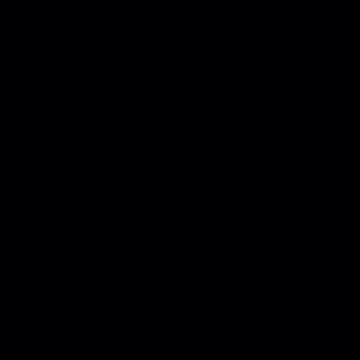
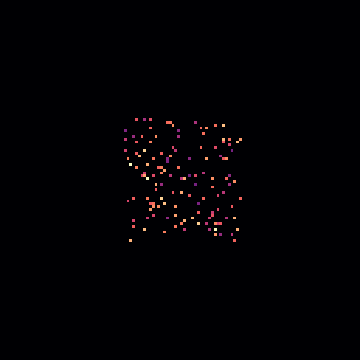
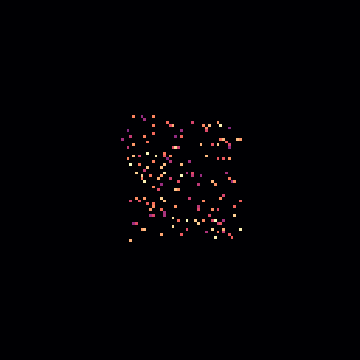
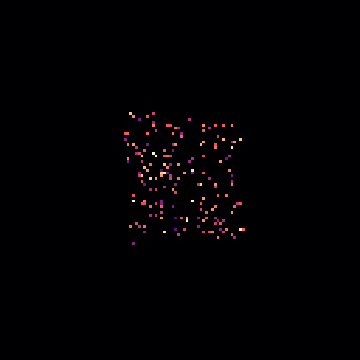
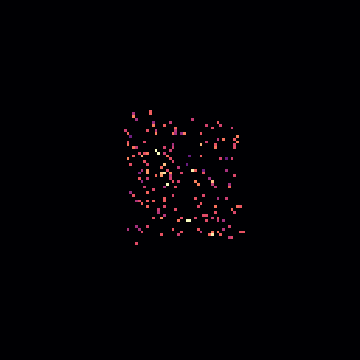
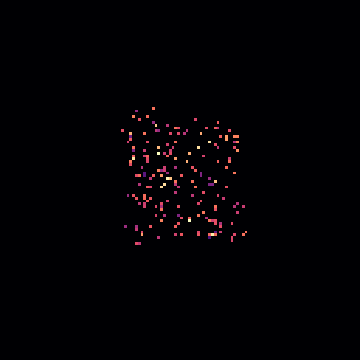
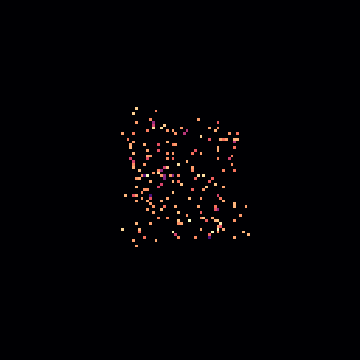
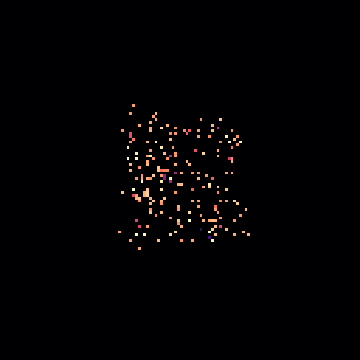
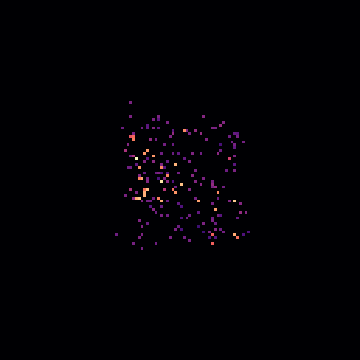
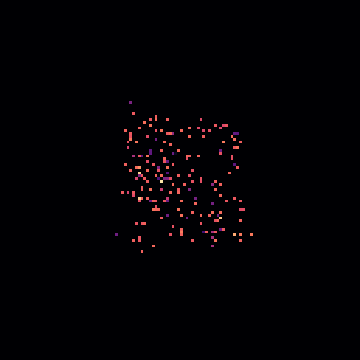
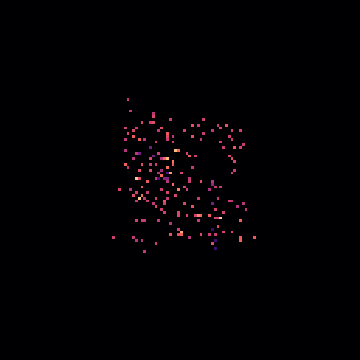
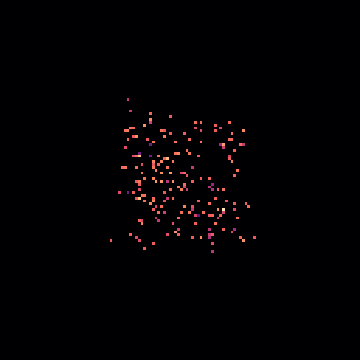
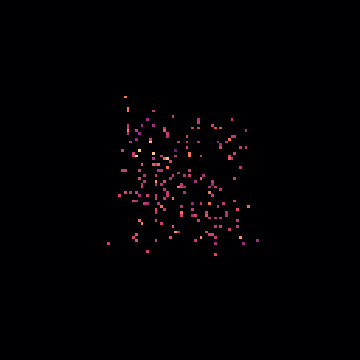
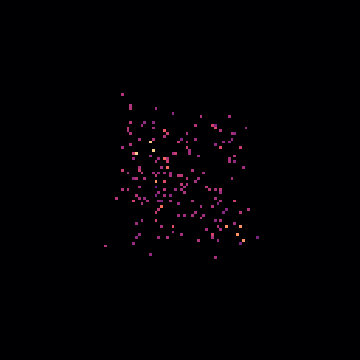
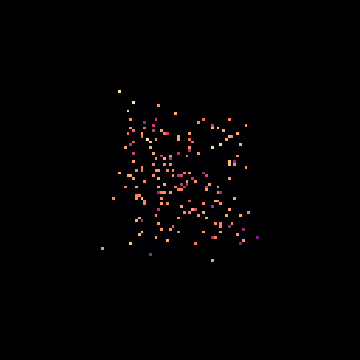
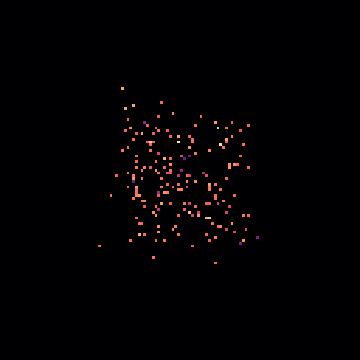
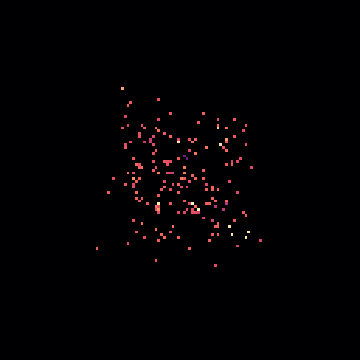
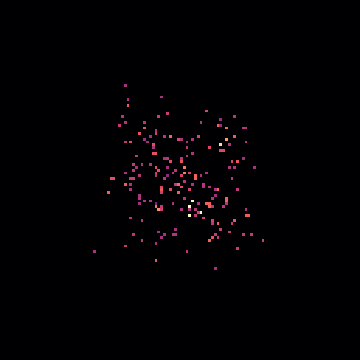
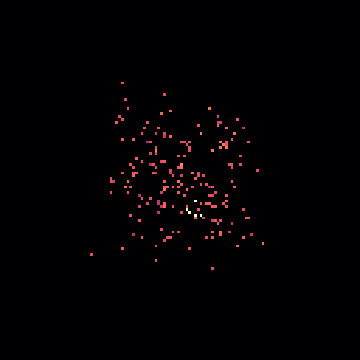
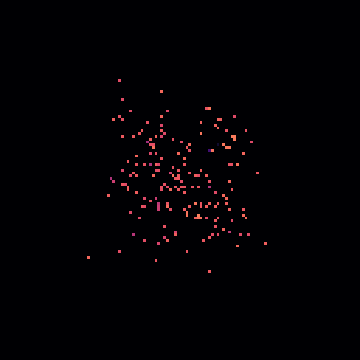
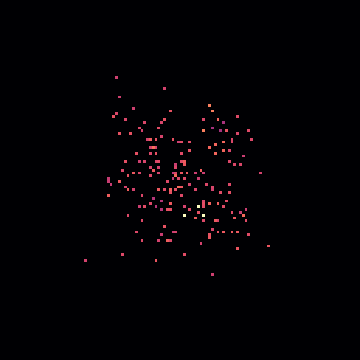
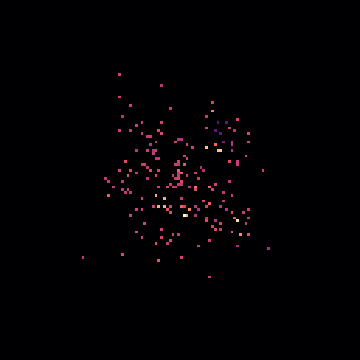
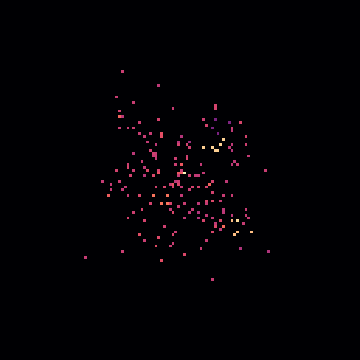
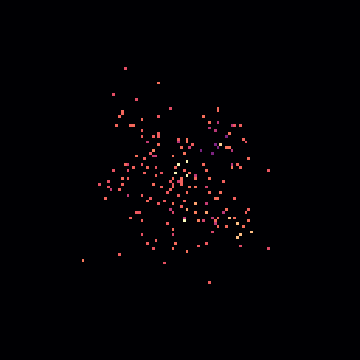
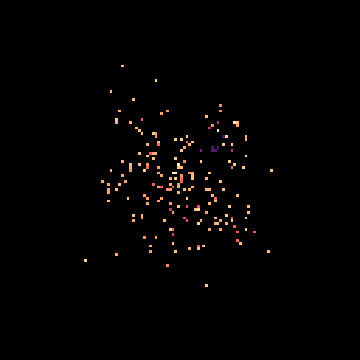
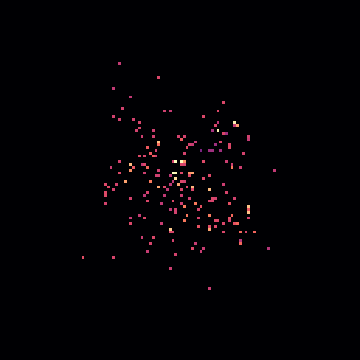
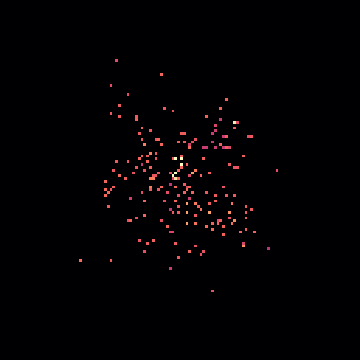
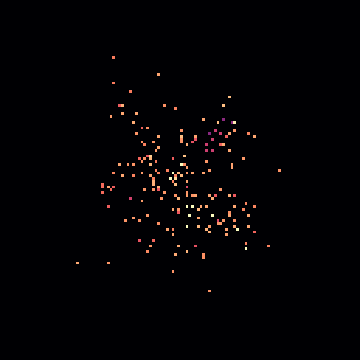
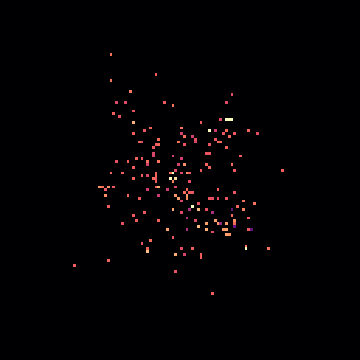
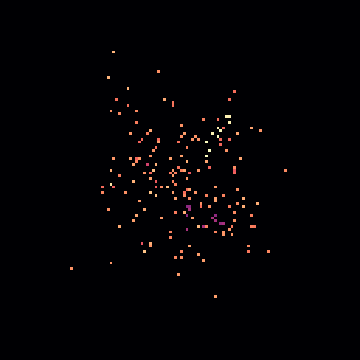
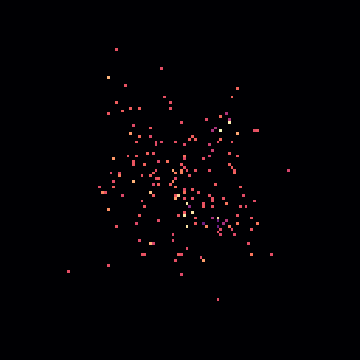
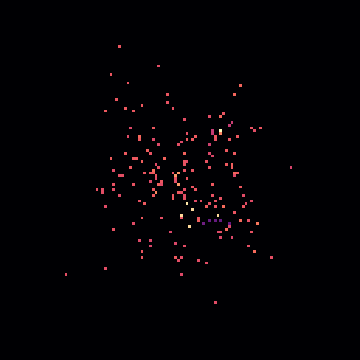
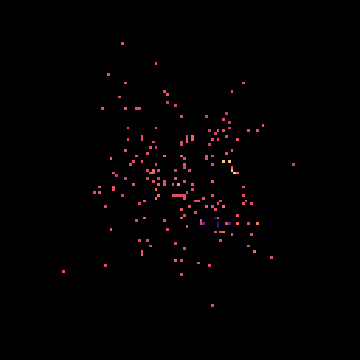
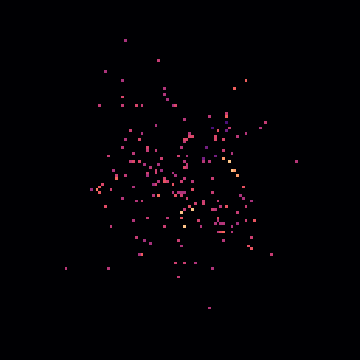
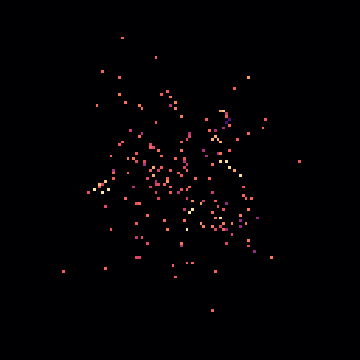
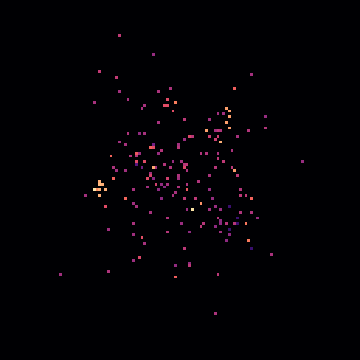
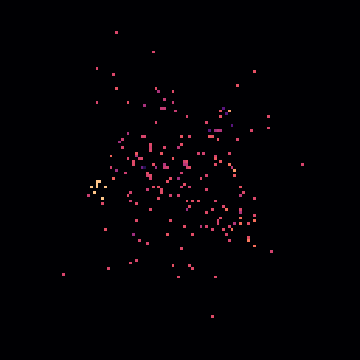
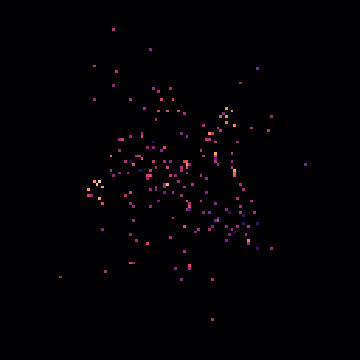
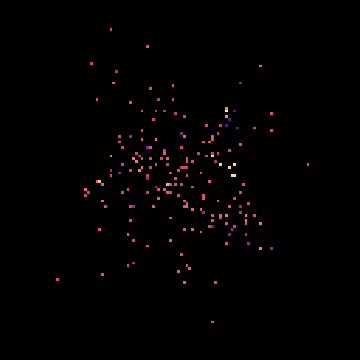
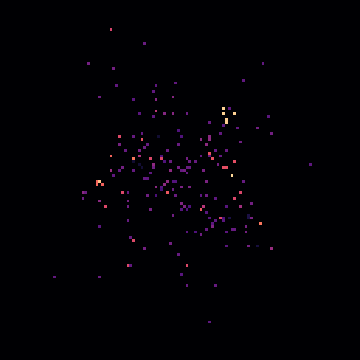
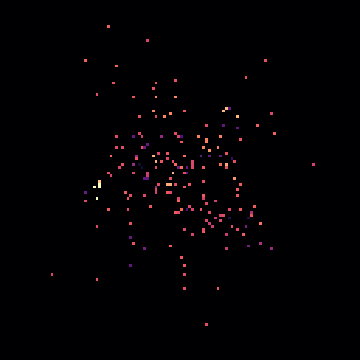
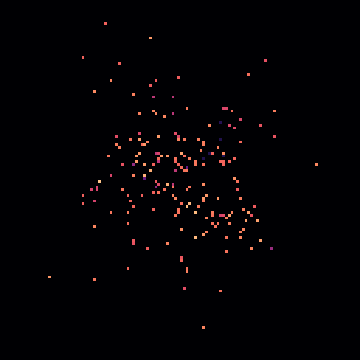
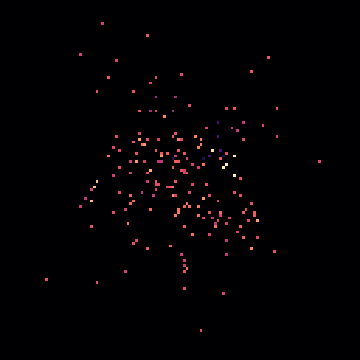
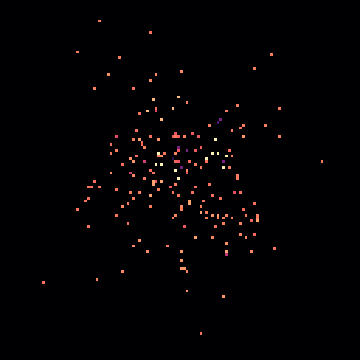
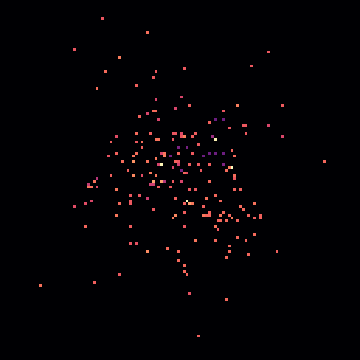
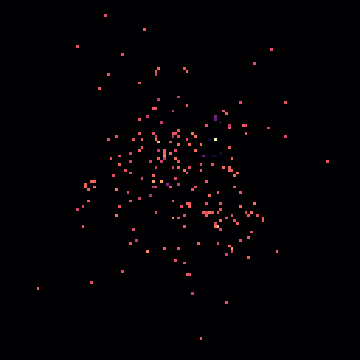
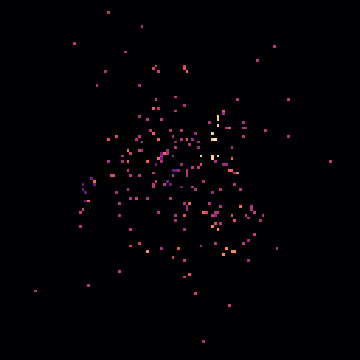
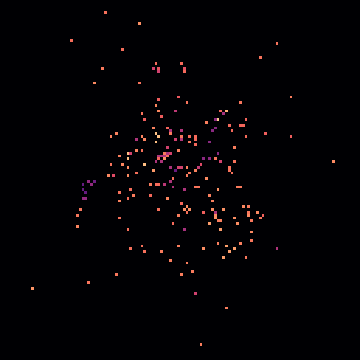
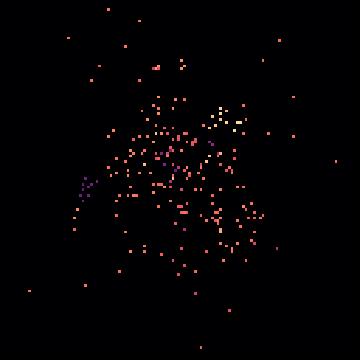
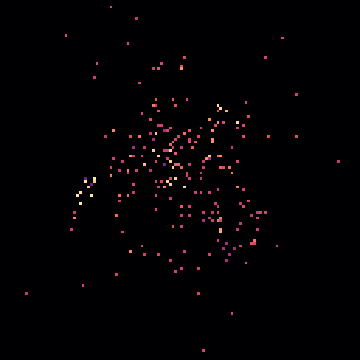
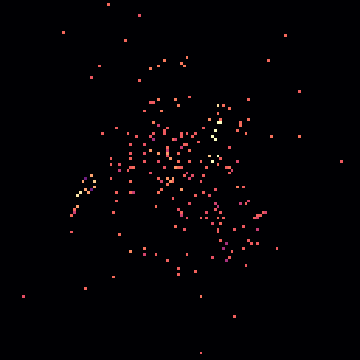
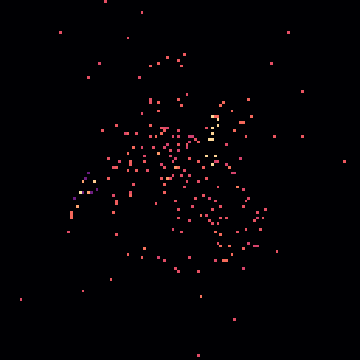
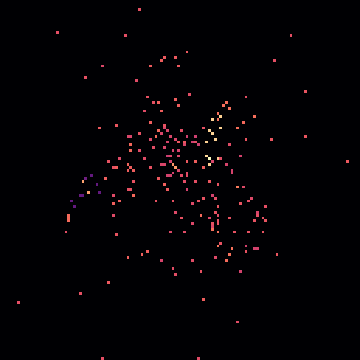
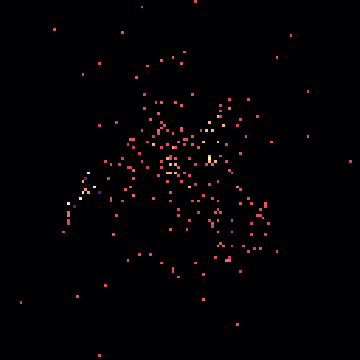
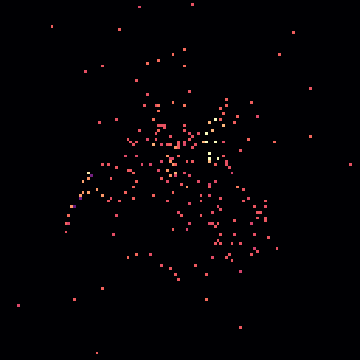
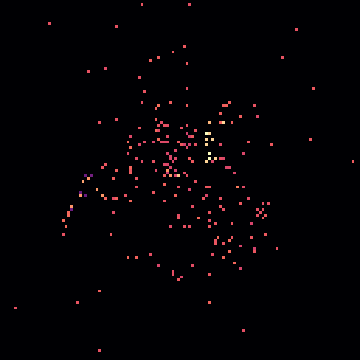
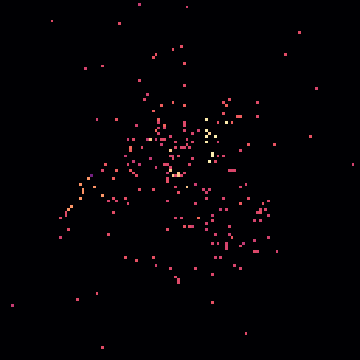
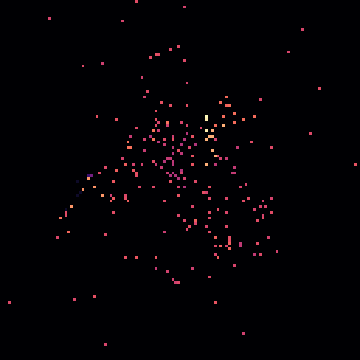
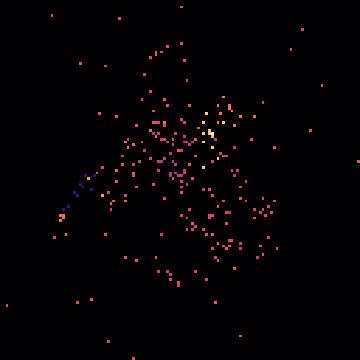
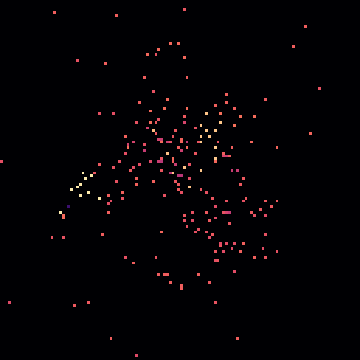
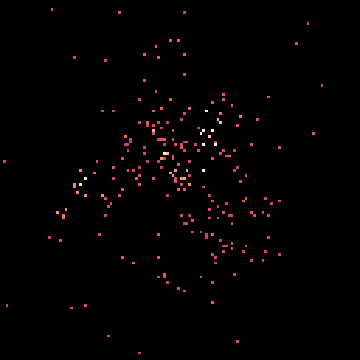
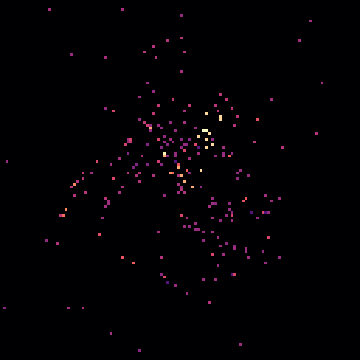
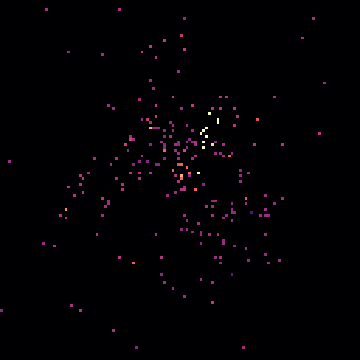
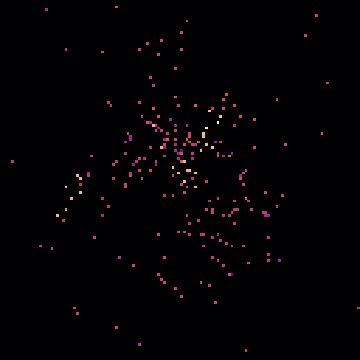
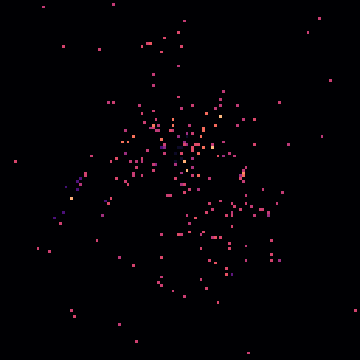
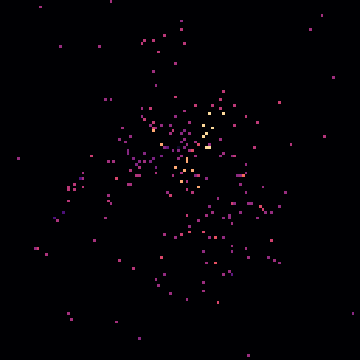
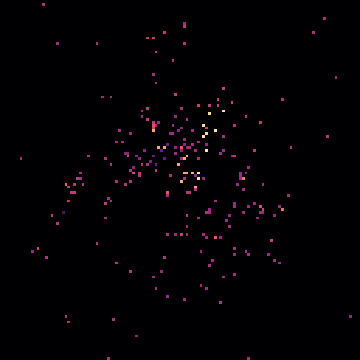
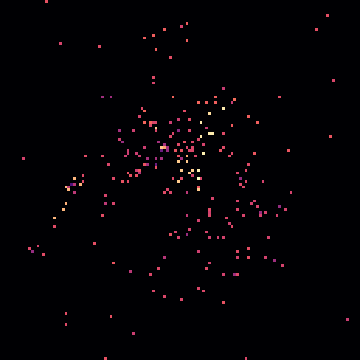
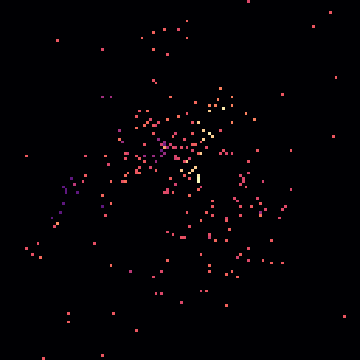
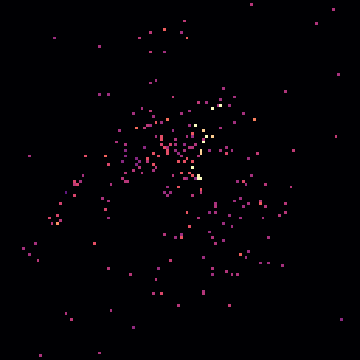
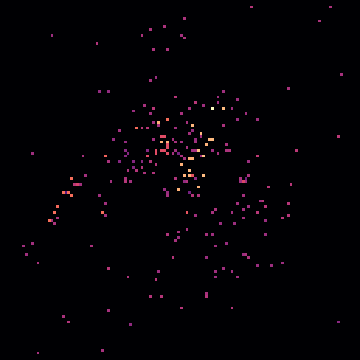
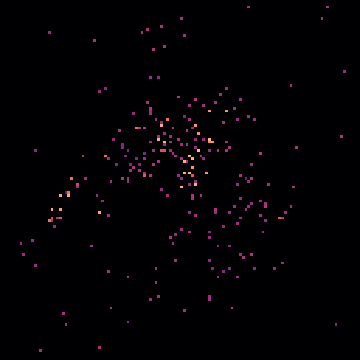
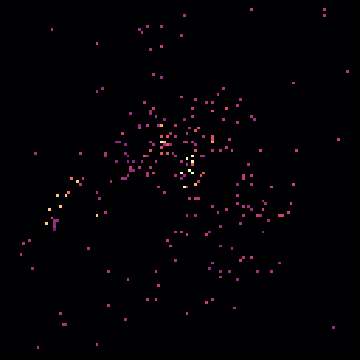
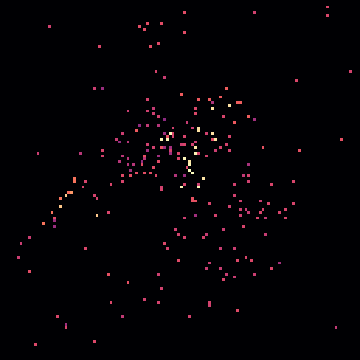
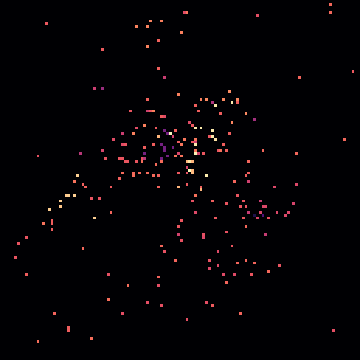
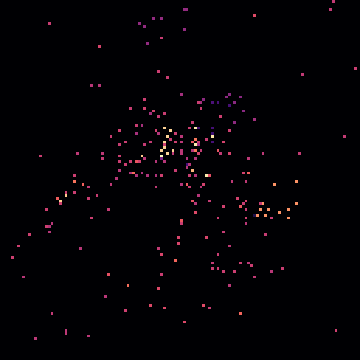
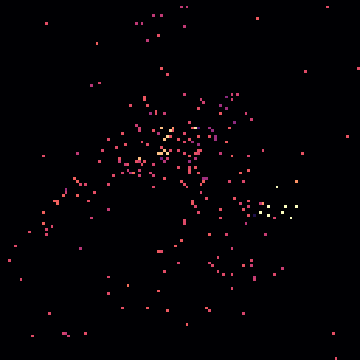
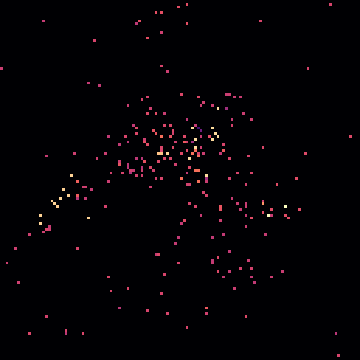
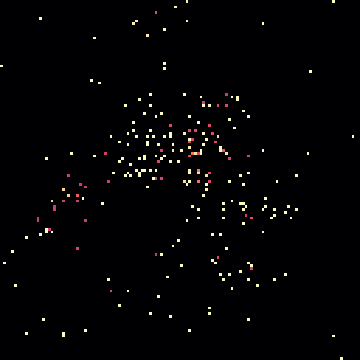
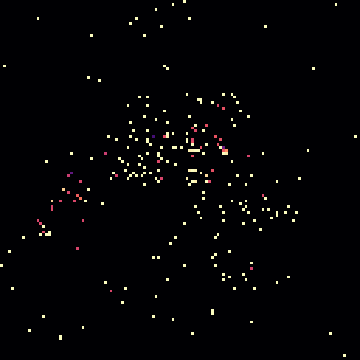
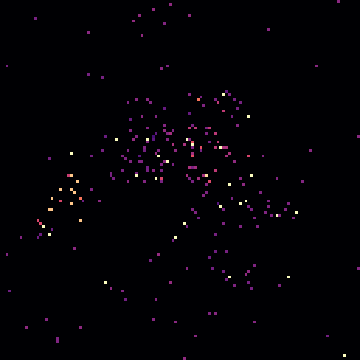
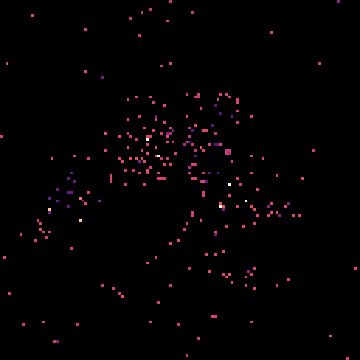
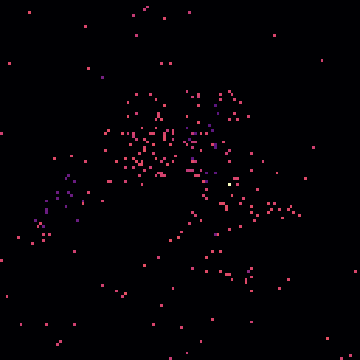
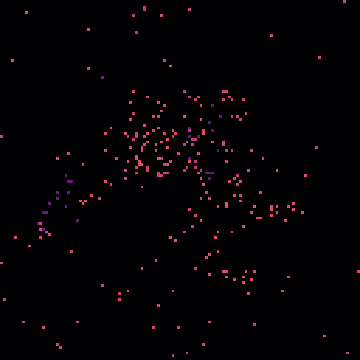
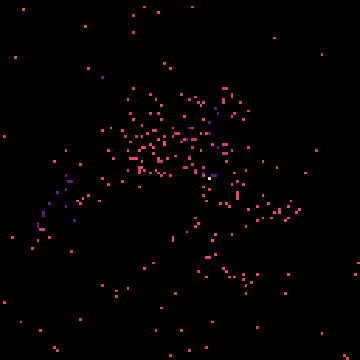
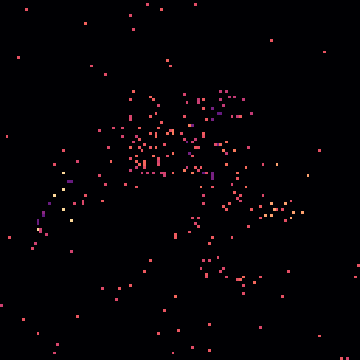
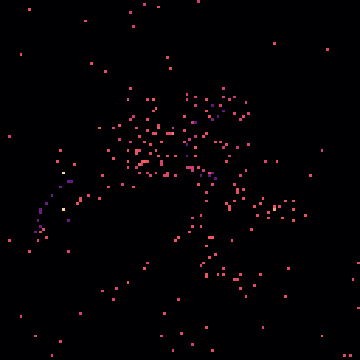
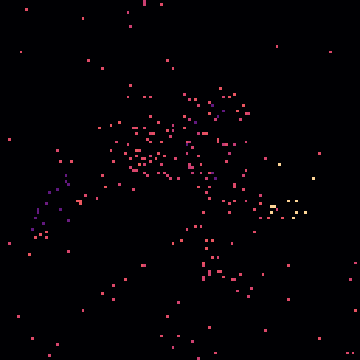
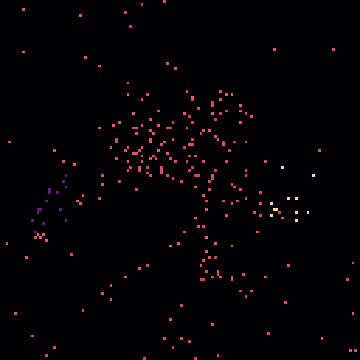
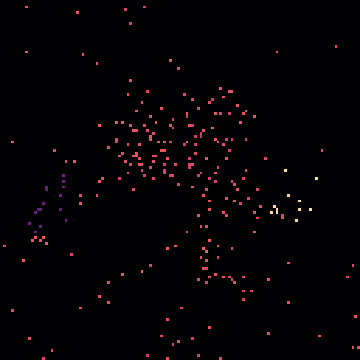
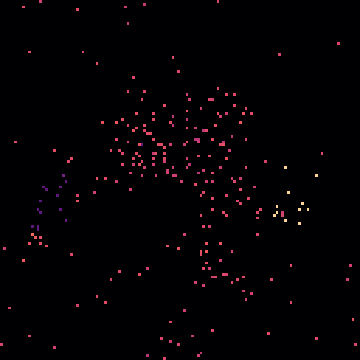
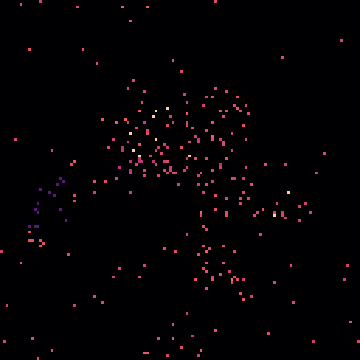
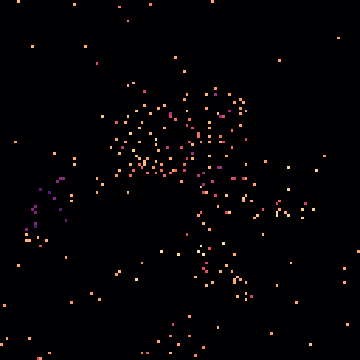
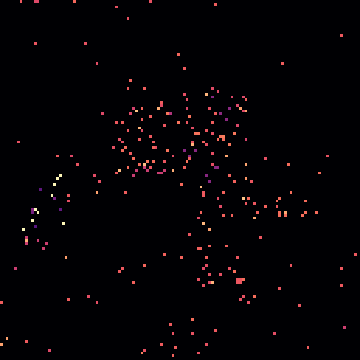
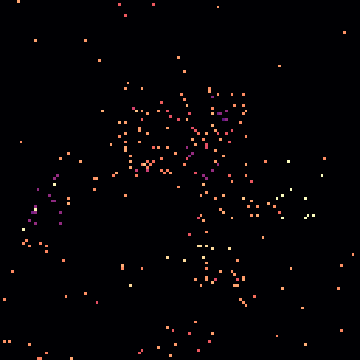
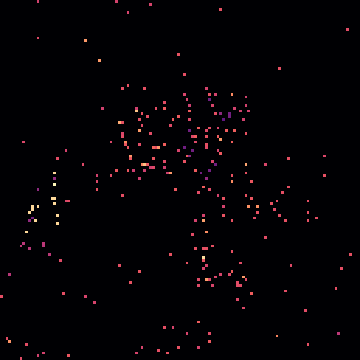
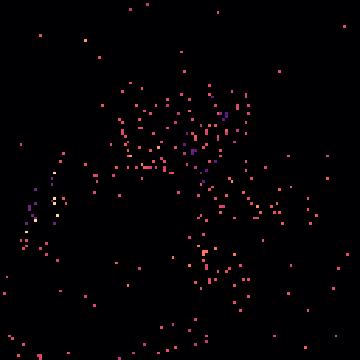
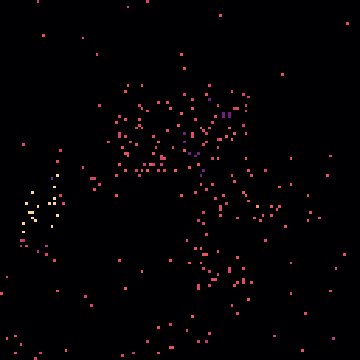
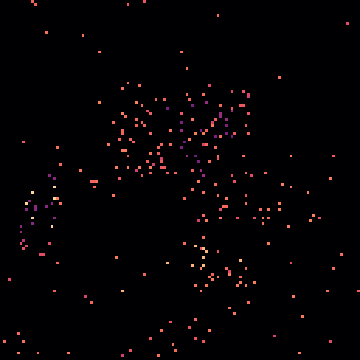
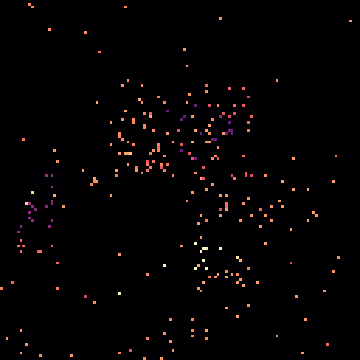

In [9]:
gr

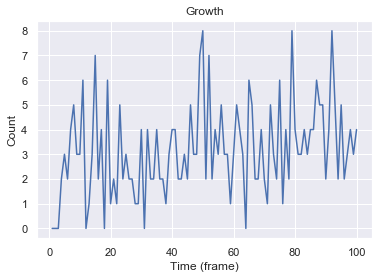

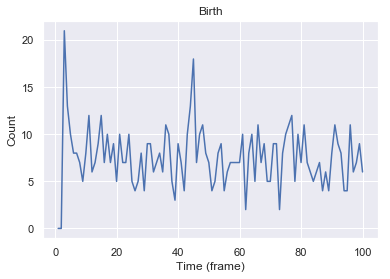

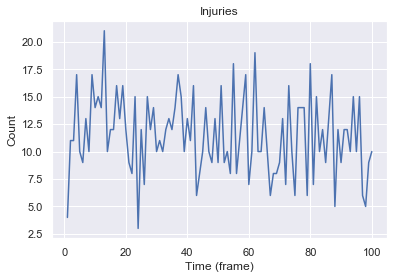

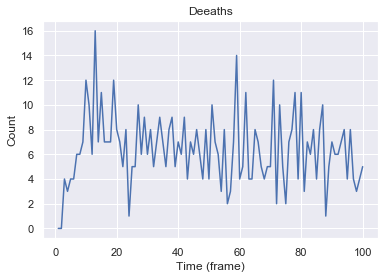

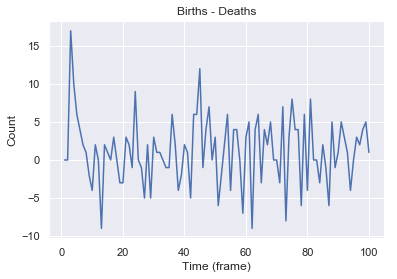

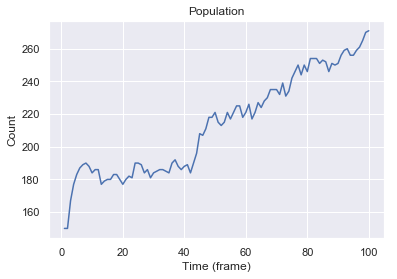

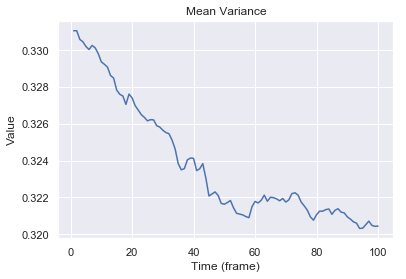

In [10]:
# Growth
plt.plot(t[:,0],t[:,1])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Growth')
plt.grid(True)
plt.show()

# Birth
plt.plot(t[:,0],t[:,2])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Birth')
plt.grid(True)
plt.show()

# Injuries
plt.plot(t[:,0],t[:,3])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Injuries')
plt.grid(True)
plt.show()

# Deaths
plt.plot(t[:,0],t[:,4])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Deeaths')
plt.grid(True)
plt.show()

# Births-Deaths
plt.plot(t[:,0],t[:,2]-t[:,4])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Births - Deaths')
plt.grid(True)
plt.show()

# Population
plt.plot(t[:,0],t[:,5])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Population')
plt.grid(True)
plt.show()

# Mean Variance
plt.plot(t[:,0],t[:,6])
plt.xlabel('Time (frame)')
plt.ylabel('Value')
plt.title('Mean Variance')
plt.grid(True)
plt.show()

In [11]:
# Summary
t

array([[  1.        ,   0.        ,   0.        ,   4.        ,
          0.        , 150.        ,   0.33105556],
       [  2.        ,   0.        ,   0.        ,  11.        ,
          0.        , 150.        ,   0.33105556],
       [  3.        ,   0.        ,  21.        ,  11.        ,
          4.        , 167.        ,   0.33058544],
       [  4.        ,   2.        ,  13.        ,  17.        ,
          3.        , 177.        ,   0.33045616],
       [  5.        ,   3.        ,  10.        ,  10.        ,
          4.        , 183.        ,   0.33019915],
       [  6.        ,   2.        ,   8.        ,   9.        ,
          4.        , 187.        ,   0.33003543],
       [  7.        ,   4.        ,   8.        ,  13.        ,
          6.        , 189.        ,   0.33025664],
       [  8.        ,   5.        ,   7.        ,  10.        ,
          6.        , 190.        ,   0.33012631],
       [  9.        ,   3.        ,   5.        ,  17.        ,
          7.    

In [12]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 911\nNumber of edges: 760\nAverage degree:   1.6685'

***
# Continue with previous results
***

In [13]:
c, cw, fn, db = extract_tribe(c, cw, fn, 5, [0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 3 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 3
 2 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 4 0 0 0 3 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0
 3 0 0 1 0 0 3 0 0 1 0 0 3 0 1 0 0 0 0 0 2 0 0 0 4 0 0 4 0 0 0 0 0 1 0 3 0
 0 0 0 0 2 0 0 0 0 0 3 4 0 4 2 4 0 1 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 1
 1 2 1 0 3 0 3 4 0 0 2 3 0 0 0 0 0 0 0 0 0 0 1 0 1 0 4 0 0 0 0 3 4 2 0 0 0
 2 0 0 0 4 2 0 0 0 0 0 0]
[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 75, 76, 77, 78, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 95, 96, 97, 99, 100, 101, 102, 103, 104, 105, 106, 107, 109, 110, 111, 112, 113, 115, 116, 117, 119, 120, 121, 122, 1

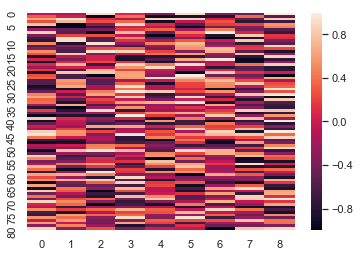

In [14]:
ax = sns.heatmap(cw[0].reshape((sight*sight, 3*3)))

In [15]:
entropy(cw[0])

-inf

In [16]:
gr, c, cw, fn, g, t, a = slime(c, cw, fn, start_pop=150, board_size=128, frames=100, experimental = True, log = True)

Vincent Gomez DDS raised hp to 3.0.
Aaron Zuniga underwent mitosis.  Gave birth to Erin Jones.
Colin Thomas raised hp to 3.0.
Lauren Randall raised hp to 2.0.
Jodi Gonzalez raised hp to 3.0.
Cynthia Jackson raised hp to 3.0.
Danielle Lee raised hp to 2.0.
Sharon Mason underwent mitosis.  Gave birth to Jill Moore.
Nicole Jones raised hp to 2.0.
Billy Mayo raised hp to 3.0.
Joshua Gonzalez raised hp to 3.0.
John Garcia raised hp to 2.0.
Monica Harris underwent mitosis.  Gave birth to Michele Berg.
Sheri Davis raised hp to 3.0.
Robert Martin raised hp to 3.0.
Kimberly Smith underwent mitosis.  Gave birth to Ashley Tapia.
Rachel Zimmerman raised hp to 3.0.
Bailey Brooks attacked Michael Jenkins!
Bailey Brooks hp: 2.0 --> 3.0
Michael Jenkins hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Bailey Brooks's neural network.
Patricia Ellis attacked Julie Maldonado!
Patricia Ellis hp: 1.0 --> 3.0
Julie Maldonado hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Patricia Ell

Mark Meza underwent mitosis.  Gave birth to Scott Sanchez.
Sheri Davis underwent mitosis.  Gave birth to Lisa Fry.
Dr. Jennifer Richardson MD attacked Melissa Marshall!
Dr. Jennifer Richardson MD hp: 3.0 --> 1.0
Melissa Marshall hp: 8.0 --> 10.0
Experimental nurture reenforcement modified Dr. Jennifer Richardson MD's neural network.
Angela Holloway attacked Anthony Marshall!
Angela Holloway hp: 2.0 --> 3.0
Anthony Marshall hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Angela Holloway's neural network.
Lucas Ramos MD attacked Kevin Miller!
Lucas Ramos MD hp: 9.0 --> 12.0
Kevin Miller hp: 7.0 --> 4.0
Experimental nurture reenforcement modified Lucas Ramos MD's neural network.
Patricia Ellis underwent mitosis.  Gave birth to Wesley Vance.
Maria Morgan underwent mitosis.  Gave birth to Justin Jennings.
Melissa Marshall underwent mitosis.  Gave birth to James Washington.
Maria Dennis attacked Matthew Drake!
Maria Dennis hp: 2.0 --> 3.0
Matthew Drake hp: 2.0 --> 1.0
Experimenta

Nancy Barnes attacked Joseph Castro!
Nancy Barnes hp: 3.0 --> 2.0
Joseph Castro hp: 37.0 --> 38.0
Experimental nurture reenforcement modified Nancy Barnes's neural network.
Theodore Gilbert attacked Angela Johnson!
Theodore Gilbert hp: 2.0 --> 3.0
Angela Johnson hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Theodore Gilbert's neural network.
Eric Powell attacked Tara Burke!
Eric Powell hp: 1.0 --> -1.0
Tara Burke hp: 9.0 --> 11.0
Experimental nurture reenforcement modified Eric Powell's neural network.
Eric Powell collapsed from injury!.
Matthew Moore attacked Maria Dennis!
Matthew Moore hp: 4.0 --> 7.0
Maria Dennis hp: 3.0 --> 0.0
Experimental nurture reenforcement modified Matthew Moore's neural network.
Maria Dennis collapsed from injury!.
Melissa Marshall attacked Alexis Cooper!
Melissa Marshall hp: 13.0 --> 12.0
Alexis Cooper hp: 39.0 --> 40.0
Experimental nurture reenforcement modified Melissa Marshall's neural network.
Maria Dennis attacked Matthew Moore!
Maria Den

Cameron Marshall attacked Angela Grant!
Cameron Marshall hp: 4.0 --> 7.0
Angela Grant hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Cameron Marshall's neural network.
Angela Grant collapsed from injury!.
Jason Ruiz attacked Brittney Ballard!
Jason Ruiz hp: 2.0 --> 2.0
Brittney Ballard hp: 2.0 --> 2.0
Experimental nurture reenforcement modified Jason Ruiz's neural network.
Katherine Powers attacked Scott Sanchez!
Katherine Powers hp: 2.0 --> 0.0
Scott Sanchez hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Katherine Powers's neural network.
Katherine Powers collapsed from injury!.
Jorge Gray attacked Karen King!
Jorge Gray hp: 2.0 --> 0.0
Karen King hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Jorge Gray's neural network.
Jorge Gray collapsed from injury!.
Theodore Gilbert raised hp to 2.0.
Kelsey Case underwent mitosis.  Gave birth to Calvin Summers.
John Smith attacked Leon Sweeney!
John Smith hp: 3.0 --> 1.0
Leon Sweeney hp: 16.0 --> 18.0
Exp

Maria Morgan attacked Cameron Marshall!
Maria Morgan hp: 4.0 --> 2.0
Cameron Marshall hp: 10.0 --> 12.0
Experimental nurture reenforcement modified Maria Morgan's neural network.
John Jenkins attacked Brett Evans!
John Jenkins hp: 2.0 --> 0.0
Brett Evans hp: 10.0 --> 12.0
Experimental nurture reenforcement modified John Jenkins's neural network.
John Jenkins collapsed from injury!.
Kendra Tate underwent mitosis.  Gave birth to Christopher Hogan.
Michael Anderson underwent mitosis.  Gave birth to Christopher Wright.
Casey Gomez collapsed from old age!.
Casey Gomez died at age 113.0.
Justin Jennings died at age 11.0.
John Jenkins died at age 10.0.
Teresa Sandoval died at age 42.0.
Steven Barnett attacked Vincent Gomez DDS!
Steven Barnett hp: 3.0 --> 6.0
Vincent Gomez DDS hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Steven Barnett's neural network.
Vincent Gomez DDS collapsed from injury!.
Kristopher Harris raised hp to 2.0.
Vincent Gomez DDS attacked Steven Barnett!
Vince

Malik Williams underwent mitosis.  Gave birth to Robert Burns II.
Felicia Smith attacked Kevin Frey!
Felicia Smith hp: 3.0 --> 6.0
Kevin Frey hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Felicia Smith's neural network.
Kevin Frey collapsed from injury!.
Walter Clayton underwent mitosis.  Gave birth to Gina Scott.
Victoria Liu underwent mitosis.  Gave birth to Sean Bell.
Natalie Wilson attacked Michael Walters!
Natalie Wilson hp: 2.0 --> 3.0
Michael Walters hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Natalie Wilson's neural network.
Brittney Ballard underwent mitosis.  Gave birth to Tara Chandler.
Kendra Tate underwent mitosis.  Gave birth to Phillip Myers.
Kim Morales raised hp to 2.0.
Michael Walters raised hp to 2.0.
Melissa Edwards attacked Jennifer Gill!
Melissa Edwards hp: 9.0 --> 13.0
Jennifer Gill hp: 8.0 --> 4.0
Experimental nurture reenforcement modified Melissa Edwards's neural network.
John Vega attacked Natasha Myers!
John Vega hp: 3.0 --> 2.

Austin Baker attacked Alexis Cooper!
Austin Baker hp: 20.0 --> 22.0
Alexis Cooper hp: 20.0 --> 18.0
Experimental nurture reenforcement modified Austin Baker's neural network.
Marcus Clay attacked Elizabeth Flores!
Marcus Clay hp: 4.0 --> 6.0
Elizabeth Flores hp: 4.0 --> 2.0
Experimental nurture reenforcement modified Marcus Clay's neural network.
Laura Martin attacked Erik Smith!
Laura Martin hp: 2.0 --> 4.0
Erik Smith hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Laura Martin's neural network.
Erik Smith collapsed from injury!.
Wendy Walsh raised hp to 2.0.
Regina Perez collapsed from old age!.
Regina Perez died at age 122.0.
Katherine Yu died at age 17.0.
Erik Smith died at age 13.0.
Mitchell Wells died at age 1.0.
Nicole Jones died at age 45.0.
Matthew Martin attacked Marco Compton!
Matthew Martin hp: 1.0 --> -1.0
Marco Compton hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Matthew Martin's neural network.
Matthew Martin collapsed from injury!.
Scott Sanch

Jeffery Smith underwent mitosis.  Gave birth to Bethany Day.
Julie Oneal attacked Wendy Walsh!
Julie Oneal hp: 2.0 --> 3.0
Wendy Walsh hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Julie Oneal's neural network.
Debra Smith raised hp to 0.0.
Jessica Rodriguez raised hp to 1.0.
Laura Martin attacked Kendra Figueroa!
Laura Martin hp: 1.0 --> -1.0
Kendra Figueroa hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Laura Martin's neural network.
Laura Martin collapsed from injury!.
Kevin Jones attacked Vanessa Ford!
Kevin Jones hp: 2.0 --> 1.0
Vanessa Ford hp: 5.0 --> 6.0
Experimental nurture reenforcement modified Kevin Jones's neural network.
Lisa Hanson attacked Natasha Myers!
Lisa Hanson hp: 0.0 --> -1.0
Natasha Myers hp: 15.0 --> 16.0
Experimental nurture reenforcement modified Lisa Hanson's neural network.
Lisa Hanson collapsed from injury!.
Ryan Carpenter collapsed from old age!.
Victor Stevenson collapsed from old age!.
Ryan Carpenter died at age 122.0.
Victor 

Natasha Myers attacked Diamond Smith!
Natasha Myers hp: 16.0 --> 18.0
Diamond Smith hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Natasha Myers's neural network.
Diamond Smith collapsed from injury!.
Robert Luna raised hp to 2.0.
Andrew Thomas raised hp to 2.0.
Phillip Martin underwent mitosis.  Gave birth to John Cole.
Ann Prince attacked Brittney Ballard!
Ann Prince hp: 1.0 --> -1.0
Brittney Ballard hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Ann Prince's neural network.
Ann Prince collapsed from injury!.
Brian Williams underwent mitosis.  Gave birth to Daniel Mcbride.
Paul Nelson attacked Lauren Smith!
Paul Nelson hp: 2.0 --> 0.0
Lauren Smith hp: 7.0 --> 9.0
Experimental nurture reenforcement modified Paul Nelson's neural network.
Paul Nelson collapsed from injury!.
Melissa Marshall attacked James Washington!
Melissa Marshall hp: 21.0 --> 24.0
James Washington hp: 5.0 --> 2.0
Experimental nurture reenforcement modified Melissa Marshall's neural network.

Tracy Vaughan MD raised hp to -4.0.
Edward Watts underwent mitosis.  Gave birth to Kim Ford.
Anthony Hansen died at age 27.0.
Kirk Jones died at age 16.0.
Laura Watson died at age 105.0.
Tracy Vaughan MD died at age 3.0.
Phillip Martin died at age 60.0.
James Robinson died at age 42.0.
Angela Hernandez attacked Marc Huber!
Angela Hernandez hp: 2.0 --> 2.0
Marc Huber hp: 2.0 --> 2.0
Experimental nurture reenforcement modified Angela Hernandez's neural network.
Erin Jones attacked Jason Robles!
Erin Jones hp: 8.0 --> 11.0
Jason Robles hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Erin Jones's neural network.
Jason Robles collapsed from injury!.
Brittney Ballard underwent mitosis.  Gave birth to Julie Wright.
James Smith attacked Charlotte Drake!
James Smith hp: 1.0 --> 1.0
Charlotte Drake hp: 1.0 --> 1.0
Experimental nurture reenforcement modified James Smith's neural network.
Melissa Edwards attacked Phillip Myers!
Melissa Edwards hp: 19.0 --> 22.0
Phillip Myers hp: 2.0 -

Benjamin Phillips raised hp to 2.0.
Sean Bell underwent mitosis.  Gave birth to Sabrina Henderson MD.
Julie Oneal attacked Jennifer Walker!
Julie Oneal hp: 4.0 --> 1.0
Jennifer Walker hp: 5.0 --> 8.0
Experimental nurture reenforcement modified Julie Oneal's neural network.
Brett Vazquez underwent mitosis.  Gave birth to Dawn Singleton.
Linda Woodard raised hp to 2.0.
Sabrina Mata attacked Emily Stout!
Sabrina Mata hp: 2.0 --> 3.0
Emily Stout hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Sabrina Mata's neural network.
Cody Jones underwent mitosis.  Gave birth to Jason Ryan.
Charlotte Drake underwent mitosis.  Gave birth to Joseph Smith.
Tammy Mora PhD underwent mitosis.  Gave birth to Christopher Daugherty MD.
Jennifer Holden attacked Kristy Williams!
Jennifer Holden hp: 1.0 --> 0.0
Kristy Williams hp: 2.0 --> 3.0
Experimental nurture reenforcement modified Jennifer Holden's neural network.
Jennifer Holden collapsed from injury!.
Joel Baker died at age 7.0.
Jennifer Holden

Leon Sweeney attacked Tyler Young!
Leon Sweeney hp: 18.0 --> 21.0
Tyler Young hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Leon Sweeney's neural network.
Tyler Young collapsed from injury!.
Felicia Wilson underwent mitosis.  Gave birth to Alexander Bailey.
Natalie Wilson attacked Krista Elliott!
Natalie Wilson hp: -2.0 --> -4.0
Krista Elliott hp: 11.0 --> 13.0
Experimental nurture reenforcement modified Natalie Wilson's neural network.
Natalie Wilson collapsed from injury!.
Tyler Young raised hp to -1.0.
Melissa Edwards attacked Melissa Marshall!
Melissa Edwards hp: 22.0 --> 20.0
Melissa Marshall hp: 24.0 --> 26.0
Experimental nurture reenforcement modified Melissa Edwards's neural network.
Brandon Deleon attacked Linda Mills!
Brandon Deleon hp: 2.0 --> 2.0
Linda Mills hp: 2.0 --> 2.0
Experimental nurture reenforcement modified Brandon Deleon's neural network.
Debbie Sexton attacked Nathan Yates!
Debbie Sexton hp: 3.0 --> 6.0
Nathan Yates hp: 1.0 --> -2.0
Experimental n

Terry Garza underwent mitosis.  Gave birth to Sue Conner.
Brett Evans underwent mitosis.  Gave birth to Eric Anthony.
Ashley Tapia attacked Brittney Ballard!
Ashley Tapia hp: 2.0 --> 3.0
Brittney Ballard hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Ashley Tapia's neural network.
Derrick Flowers underwent mitosis.  Gave birth to Ashley Lee.
Kristen Casey attacked Cody Martinez!
Kristen Casey hp: 7.0 --> 7.0
Cody Martinez hp: 7.0 --> 7.0
Experimental nurture reenforcement modified Kristen Casey's neural network.
Debbie Sexton attacked Jack Benson!
Debbie Sexton hp: 3.0 --> 1.0
Jack Benson hp: 4.0 --> 6.0
Experimental nurture reenforcement modified Debbie Sexton's neural network.
Meghan Mcdaniel raised hp to 2.0.
Sabrina Henderson MD raised hp to 2.0.
Dawn Singleton raised hp to 2.0.
Jack Benson attacked Ariana Mayo!
Jack Benson hp: 6.0 --> 9.0
Ariana Mayo hp: 3.0 --> 0.0
Experimental nurture reenforcement modified Jack Benson's neural network.
Ariana Mayo collapsed from in

Andrea Hines raised hp to -1.0.
Victor Lopez underwent mitosis.  Gave birth to Rachel Mitchell.
Debra Jimenez underwent mitosis.  Gave birth to Miss Brittany Berry.
Jeremy Tran raised hp to 2.0.
Jamie Johnson attacked Kenneth Stein!
Jamie Johnson hp: 5.0 --> 8.0
Kenneth Stein hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Jamie Johnson's neural network.
Kenneth Stein collapsed from injury!.
Paul Wright attacked Kelly Martin!
Paul Wright hp: 1.0 --> 0.0
Kelly Martin hp: 5.0 --> 6.0
Experimental nurture reenforcement modified Paul Wright's neural network.
Paul Wright collapsed from injury!.
Eric Anthony attacked Brett Evans!
Eric Anthony hp: 3.0 --> 5.0
Brett Evans hp: 3.0 --> 1.0
Experimental nurture reenforcement modified Eric Anthony's neural network.
Matthew Blevins raised hp to 2.0.
Robert Pham raised hp to 2.0.
Gwendolyn Pennington raised hp to 2.0.
Leah Hale attacked Shelby George!
Leah Hale hp: 2.0 --> 4.0
Shelby George hp: 2.0 --> 0.0
Experimental nurture reenforce

Grant Fields attacked James Gilbert!
Grant Fields hp: 4.0 --> 7.0
James Gilbert hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Grant Fields's neural network.
James Gilbert collapsed from injury!.
Brian Reyes attacked Evelyn Brown DDS!
Brian Reyes hp: 2.0 --> 5.0
Evelyn Brown DDS hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Brian Reyes's neural network.
Evelyn Brown DDS collapsed from injury!.
Curtis Ruiz died at age 26.0.
Daniel Mcbride died at age 22.0.
James Gilbert died at age 5.0.
Evelyn Brown DDS died at age 2.0.
Elizabeth Boyer died at age 87.0.
Amy Reyes died at age 55.0.
Michael Obrien attacked Steve Jackson!
Michael Obrien hp: 2.0 --> 3.0
Steve Jackson hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Michael Obrien's neural network.
Kevin Miller underwent mitosis.  Gave birth to Tiffany Mason.
Joseph Hudson attacked Kristin Chen!
Joseph Hudson hp: 2.0 --> 0.0
Kristin Chen hp: 10.0 --> 12.0
Experimental nurture reenforcement modified Jos

Christopher Daugherty MD attacked Cody Vance!
Christopher Daugherty MD hp: 1.0 --> -1.0
Cody Vance hp: 11.0 --> 13.0
Experimental nurture reenforcement modified Christopher Daugherty MD's neural network.
Christopher Daugherty MD collapsed from injury!.
Megan Bailey underwent mitosis.  Gave birth to Diane Mcclain.
Debra Jimenez attacked Cody Jones!
Debra Jimenez hp: 2.0 --> 3.0
Cody Jones hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Debra Jimenez's neural network.
Gwendolyn Pennington attacked Christian Smith!
Gwendolyn Pennington hp: 2.0 --> 5.0
Christian Smith hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Gwendolyn Pennington's neural network.
Christian Smith collapsed from injury!.
Rachel Mitchell attacked Andrea Stewart!
Rachel Mitchell hp: 2.0 --> 5.0
Andrea Stewart hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Rachel Mitchell's neural network.
Andrea Stewart collapsed from injury!.
Andrea Stewart attacked Rachel Mitchell!
Andrea Stewart

Dr. Steven Johnson underwent mitosis.  Gave birth to Nicholas Hart.
Gary Arnold underwent mitosis.  Gave birth to Anthony Chen.
Shelly Barnes attacked Brian Travis!
Shelly Barnes hp: 2.0 --> 3.0
Brian Travis hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Shelly Barnes's neural network.
Jeffery Stevens attacked Alexa Harrison!
Jeffery Stevens hp: 1.0 --> -1.0
Alexa Harrison hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Jeffery Stevens's neural network.
Jeffery Stevens collapsed from injury!.
Dylan King raised hp to 2.0.
Brian Travis attacked Shelly Barnes!
Brian Travis hp: 1.0 --> -1.0
Shelly Barnes hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Brian Travis's neural network.
Brian Travis collapsed from injury!.
John May attacked Brandy Romero!
John May hp: 5.0 --> 8.0
Brandy Romero hp: 3.0 --> 0.0
Experimental nurture reenforcement modified John May's neural network.
Brandy Romero collapsed from injury!.
Derrick Brown raised hp to 2.0.
Eugene Rog

Rachel Zimmerman attacked Megan Obrien!
Rachel Zimmerman hp: 3.0 --> 6.0
Megan Obrien hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Rachel Zimmerman's neural network.
Megan Obrien collapsed from injury!.
Cody Vance attacked Christina Jacobs!
Cody Vance hp: 13.0 --> 16.0
Christina Jacobs hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Cody Vance's neural network.
Christina Jacobs collapsed from injury!.
Michael Smith attacked Edwin Price!
Michael Smith hp: 2.0 --> 2.0
Edwin Price hp: 2.0 --> 2.0
Experimental nurture reenforcement modified Michael Smith's neural network.
Ashley Mccoy underwent mitosis.  Gave birth to Jeffery Cameron.
Anna Herman raised hp to 2.0.
Debra Jimenez underwent mitosis.  Gave birth to Beverly Norman.
Robert Schneider attacked Jason Ryan!
Robert Schneider hp: 5.0 --> 8.0
Jason Ryan hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Robert Schneider's neural network.
Jason Ryan collapsed from injury!.
Joshua Stone underwent mi

Eduardo Erickson attacked John May!
Eduardo Erickson hp: 2.0 --> 3.0
John May hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Eduardo Erickson's neural network.
Elizabeth Cameron raised hp to 2.0.
Heather Gardner raised hp to 2.0.
Michael Hudson attacked Elizabeth Bryant!
Michael Hudson hp: 2.0 --> 1.0
Elizabeth Bryant hp: 8.0 --> 9.0
Experimental nurture reenforcement modified Michael Hudson's neural network.
Julie Wright died at age 34.0.
Nicholas Dennis attacked Linda Hendricks!
Nicholas Dennis hp: 2.0 --> 3.0
Linda Hendricks hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Nicholas Dennis's neural network.
Erin Jones attacked Vanessa Ford!
Erin Jones hp: 9.0 --> 12.0
Vanessa Ford hp: 1.0 --> -2.0
Experimental nurture reenforcement modified Erin Jones's neural network.
Vanessa Ford collapsed from injury!.
Dr. Steven Johnson underwent mitosis.  Gave birth to Tracey Lewis.
Joseph Burke raised hp to 2.0.
Brandon Deleon raised hp to 2.0.
Kayla Bauer attacked Brand

Kristin Chen underwent mitosis.  Gave birth to Jose Stevens.
Shannon Yang underwent mitosis.  Gave birth to Susan Greer.
Anna Herman attacked John Reynolds!
Anna Herman hp: 1.0 --> -1.0
John Reynolds hp: 3.0 --> 5.0
Experimental nurture reenforcement modified Anna Herman's neural network.
Anna Herman collapsed from injury!.
David Bradley attacked Michelle Robinson!
David Bradley hp: 5.0 --> 8.0
Michelle Robinson hp: 4.0 --> 1.0
Experimental nurture reenforcement modified David Bradley's neural network.
Elizabeth Bryant underwent mitosis.  Gave birth to Cameron Estes.
Diane Young underwent mitosis.  Gave birth to Steven Thompson.
Grant Fields underwent mitosis.  Gave birth to Brian Lee.
Linda Riggs attacked Jeffrey Benton!
Linda Riggs hp: 2.0 --> 0.0
Jeffrey Benton hp: 9.0 --> 11.0
Experimental nurture reenforcement modified Linda Riggs's neural network.
Linda Riggs collapsed from injury!.
Stephen Hubbard underwent mitosis.  Gave birth to Tammy Hicks.
Stephanie Reed attacked Nicholas Ha

James Brooks died at age 26.0.
Jeffrey Benton died at age 12.0.
Melanie Wheeler died at age 3.0.
Krista Elliott underwent mitosis.  Gave birth to Joshua Robinson.
Laurie Allen attacked Linda Thomas!
Laurie Allen hp: 7.0 --> 7.0
Linda Thomas hp: 7.0 --> 7.0
Experimental nurture reenforcement modified Laurie Allen's neural network.
Amy Holland attacked Kayla Bauer!
Amy Holland hp: 2.0 --> 3.0
Kayla Bauer hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Amy Holland's neural network.
Diane Thomas underwent mitosis.  Gave birth to Stephen Livingston.
Kayla Bauer raised hp to 2.0.
Nicole Thompson underwent mitosis.  Gave birth to Lindsay Rose.
Christopher Morris underwent mitosis.  Gave birth to Walter Ray.
Paul Page raised hp to 2.0.
Jessica Durham underwent mitosis.  Gave birth to Tiffany Matthews.
Tommy Ramirez raised hp to 2.0.
Monica Smith attacked Jay Flynn!
Monica Smith hp: 4.0 --> 2.0
Jay Flynn hp: 8.0 --> 10.0
Experimental nurture reenforcement modified Monica Smith's neu

David Stevens underwent mitosis.  Gave birth to Amanda Chapman.
Anthony Goodman attacked Patricia Evans!
Anthony Goodman hp: 8.0 --> 10.0
Patricia Evans hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Anthony Goodman's neural network.
Patricia Evans collapsed from injury!.
Julie Green underwent mitosis.  Gave birth to Brent Washington.
Bonnie Smith underwent mitosis.  Gave birth to Tom George.
Joshua Robinson attacked Michelle Carlson!
Joshua Robinson hp: 12.0 --> 15.0
Michelle Carlson hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Joshua Robinson's neural network.
Michelle Carlson collapsed from injury!.
Walter Ray raised hp to 2.0.
Julian Martin attacked Marc Huber!
Julian Martin hp: 2.0 --> 4.0
Marc Huber hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Julian Martin's neural network.
Marc Huber collapsed from injury!.
Jeffery Wright collapsed from old age!.
Amber Best died at age 72.0.
Marc Huber died at age 53.0.
Sabrina Henderson MD died at ag

Richard Ross attacked Daniel Walters!
Richard Ross hp: 3.0 --> 6.0
Daniel Walters hp: 2.0 --> -1.0
Experimental nurture reenforcement modified Richard Ross's neural network.
Daniel Walters collapsed from injury!.
Zachary Martinez attacked David Benson!
Zachary Martinez hp: 2.0 --> -1.0
David Benson hp: 3.0 --> 6.0
Experimental nurture reenforcement modified Zachary Martinez's neural network.
Zachary Martinez collapsed from injury!.
Julia Gutierrez DDS underwent mitosis.  Gave birth to Jerome Torres.
David Stevens raised hp to 2.0.
Carl Pena attacked Shannon Doyle!
Carl Pena hp: 1.0 --> -1.0
Shannon Doyle hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Carl Pena's neural network.
Carl Pena collapsed from injury!.
Elizabeth Johnson raised hp to 2.0.
Carrie Mack underwent mitosis.  Gave birth to Bryan Velazquez.
Mark Bean attacked Shelly Barnes!
Mark Bean hp: 8.0 --> 11.0
Shelly Barnes hp: 3.0 --> 0.0
Experimental nurture reenforcement modified Mark Bean's neural network.
Shel

Jennifer Hernandez attacked Brittany Jarvis!
Jennifer Hernandez hp: 5.0 --> 7.0
Brittany Jarvis hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Jennifer Hernandez's neural network.
Brittany Jarvis collapsed from injury!.
Jeffrey Cortez underwent mitosis.  Gave birth to James Martinez.
Dawn Singleton underwent mitosis.  Gave birth to Benjamin Robles.
Ashley Lee raised hp to 2.0.
Donna Alexander underwent mitosis.  Gave birth to Paula Monroe.
Jose Hudson raised hp to 2.0.
Ronald Thompson attacked Bryan Velazquez!
Ronald Thompson hp: 2.0 --> -1.0
Bryan Velazquez hp: 6.0 --> 9.0
Experimental nurture reenforcement modified Ronald Thompson's neural network.
Ronald Thompson collapsed from injury!.
Donald Nunez attacked Laurie Allen!
Donald Nunez hp: 1.0 --> -1.0
Laurie Allen hp: 9.0 --> 11.0
Experimental nurture reenforcement modified Donald Nunez's neural network.
Donald Nunez collapsed from injury!.
Aaron Hampton raised hp to 2.0.
Linda Fernandez attacked Mary Weeks!
Linda Fern

Kenneth Villanueva attacked Eric Pace!
Kenneth Villanueva hp: 1.0 --> 0.0
Eric Pace hp: 2.0 --> 3.0
Experimental nurture reenforcement modified Kenneth Villanueva's neural network.
Kenneth Villanueva collapsed from injury!.
Tracy Parker attacked Taylor Jordan!
Tracy Parker hp: 2.0 --> 4.0
Taylor Jordan hp: 2.0 --> 0.0
Experimental nurture reenforcement modified Tracy Parker's neural network.
Taylor Jordan collapsed from injury!.
Tammy Benjamin raised hp to 2.0.
Debra Smith died at age 67.0.
Melissa Williams died at age 32.0.
Taylor Jordan died at age 27.0.
Mary Clark died at age 17.0.
Rachael Blair died at age 13.0.
Johnny Warren died at age 5.0.
Kenneth Villanueva died at age 2.0.
Erin Jones underwent mitosis.  Gave birth to Tammy Thornton.
Eric Pace underwent mitosis.  Gave birth to Debra Hicks.
Patricia Jacobs attacked Elizabeth Thomas!
Patricia Jacobs hp: 2.0 --> 3.0
Elizabeth Thomas hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Patricia Jacobs's neural network.
Timot

Ana Hall attacked Tracey Lewis!
Ana Hall hp: 1.0 --> -1.0
Tracey Lewis hp: 8.0 --> 10.0
Experimental nurture reenforcement modified Ana Hall's neural network.
Ana Hall collapsed from injury!.
Billy Warren raised hp to 0.0.
Toni Martinez underwent mitosis.  Gave birth to Bradley Bennett.
Robert Allison underwent mitosis.  Gave birth to Brandon Campbell.
Leonard Miller attacked Glenn Hernandez!
Leonard Miller hp: 2.0 --> 3.0
Glenn Hernandez hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Leonard Miller's neural network.
Joshua Ballard attacked David Holland!
Joshua Ballard hp: 1.0 --> 3.0
David Holland hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Joshua Ballard's neural network.
David Holland collapsed from injury!.
Michelle Franklin attacked Brandon Campbell!
Michelle Franklin hp: 2.0 --> 3.0
Brandon Campbell hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Michelle Franklin's neural network.
Thomas Foley collapsed from old age!.
Joshua Gonzalez co

Justin Conley underwent mitosis.  Gave birth to Valerie Rosario.
Bonnie Smith attacked Wesley Thomas!
Bonnie Smith hp: 1.0 --> -2.0
Wesley Thomas hp: 2.0 --> 5.0
Experimental nurture reenforcement modified Bonnie Smith's neural network.
Bonnie Smith collapsed from injury!.
Wendy Frazier attacked David Bradley!
Wendy Frazier hp: 1.0 --> -1.0
David Bradley hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Wendy Frazier's neural network.
Wendy Frazier collapsed from injury!.
Jacob Snyder underwent mitosis.  Gave birth to Daniel Miller.
Michelle Smith underwent mitosis.  Gave birth to John Gray.
Tracey Diaz underwent mitosis.  Gave birth to Kyle Hicks.
Jasmine Zimmerman raised hp to 2.0.
Maria Ross underwent mitosis.  Gave birth to Rebecca Cook.
Tracy Parker underwent mitosis.  Gave birth to Haley Gregory.
Debra Hicks raised hp to 0.0.
Aaron Hawkins attacked Tracy Parker!
Aaron Hawkins hp: 1.0 --> 2.0
Tracy Parker hp: 1.0 --> 0.0
Experimental nurture reenforcement modified Aaron 

Tracey Diaz attacked Emily Sherman!
Tracey Diaz hp: 2.0 --> 4.0
Emily Sherman hp: 1.0 --> -1.0
Experimental nurture reenforcement modified Tracey Diaz's neural network.
Emily Sherman collapsed from injury!.
Kyle Brown attacked Bryan Velazquez!
Kyle Brown hp: 2.0 --> 0.0
Bryan Velazquez hp: 13.0 --> 15.0
Experimental nurture reenforcement modified Kyle Brown's neural network.
Kyle Brown collapsed from injury!.
David Benson underwent mitosis.  Gave birth to Victor Sanchez.
Marcus Brown underwent mitosis.  Gave birth to Jason Young.
Robert Allison underwent mitosis.  Gave birth to Ruth Rodriguez.
David Simon attacked Bradley Bennett!
David Simon hp: 3.0 --> 6.0
Bradley Bennett hp: 1.0 --> -2.0
Experimental nurture reenforcement modified David Simon's neural network.
Bradley Bennett collapsed from injury!.
Bradley Bennett attacked David Simon!
Bradley Bennett hp: -2.0 --> -4.0
David Simon hp: 6.0 --> 8.0
Experimental nurture reenforcement modified Bradley Bennett's neural network.
Bradley 

Stephen Beltran underwent mitosis.  Gave birth to Jason Reeves.
Adam Peterson attacked Sandra Ryan!
Adam Peterson hp: 2.0 --> -1.0
Sandra Ryan hp: 4.0 --> 7.0
Experimental nurture reenforcement modified Adam Peterson's neural network.
Adam Peterson collapsed from injury!.
Sara Obrien attacked Richard Russell!
Sara Obrien hp: 2.0 --> 3.0
Richard Russell hp: 2.0 --> 1.0
Experimental nurture reenforcement modified Sara Obrien's neural network.
Richard Russell raised hp to 2.0.
Kyle Taylor underwent mitosis.  Gave birth to Harry Bartlett.
Gregory Gutierrez attacked Jacob Snyder!
Gregory Gutierrez hp: 6.0 --> 10.0
Jacob Snyder hp: 3.0 --> -1.0
Experimental nurture reenforcement modified Gregory Gutierrez's neural network.
Jacob Snyder collapsed from injury!.
Sandra Ryan underwent mitosis.  Gave birth to Bryan Campbell.
Gabriella Jensen attacked Matthew Kelly!
Gabriella Jensen hp: 1.0 --> -1.0
Matthew Kelly hp: 2.0 --> 4.0
Experimental nurture reenforcement modified Gabriella Jensen's neural

Total Run Time:  106.6 seconds.



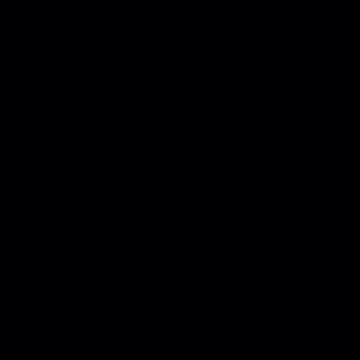
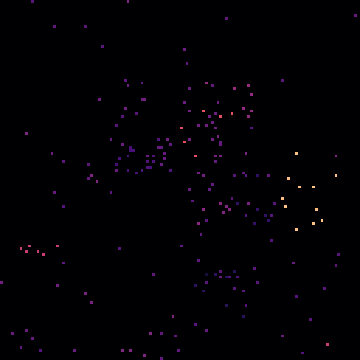
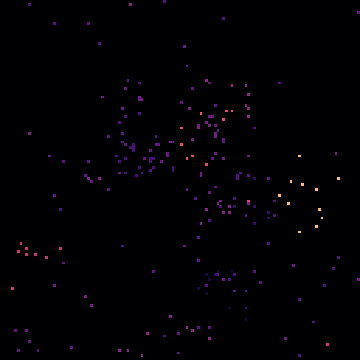
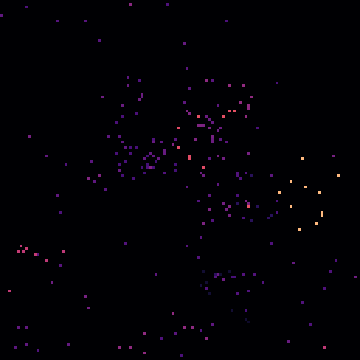
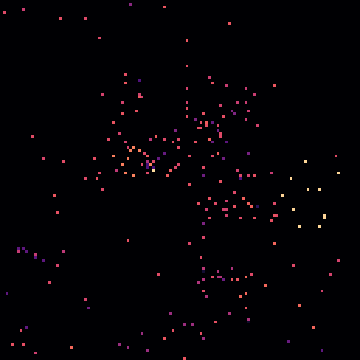
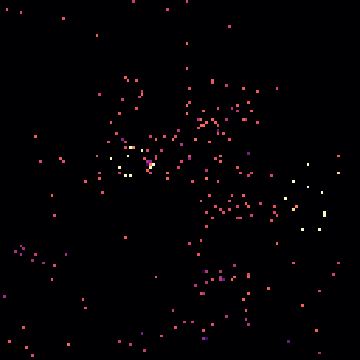
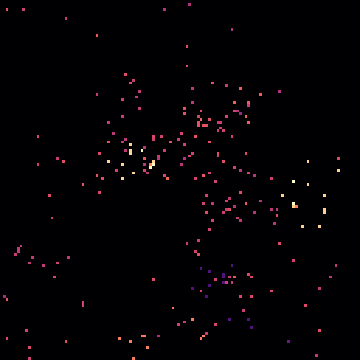
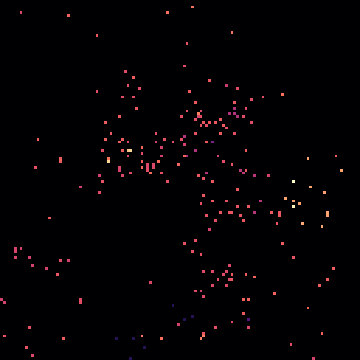
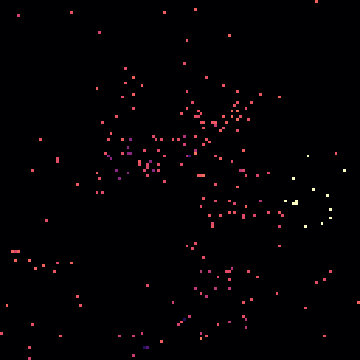
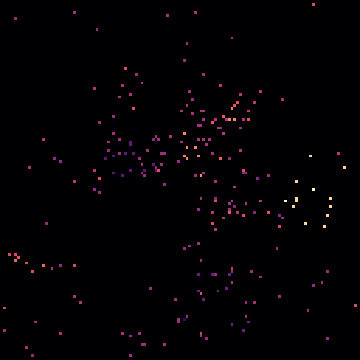
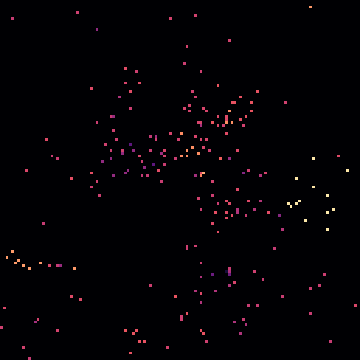
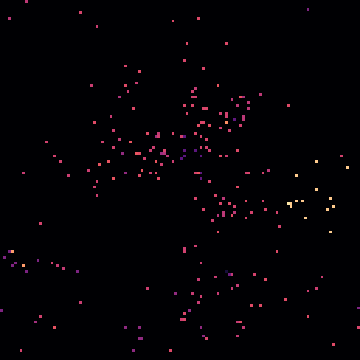
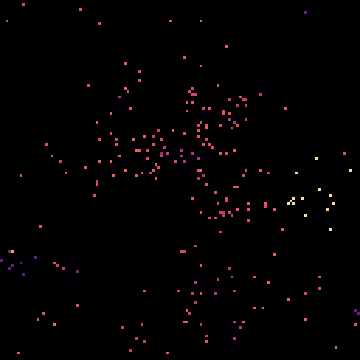
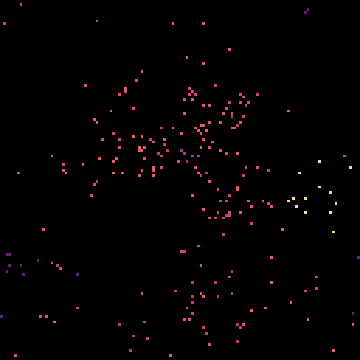
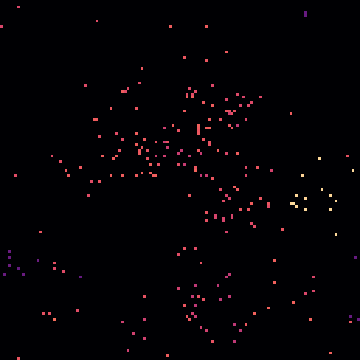
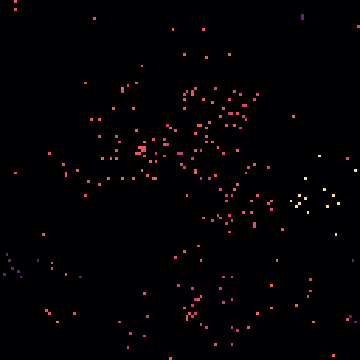
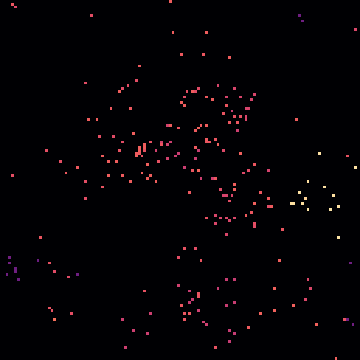
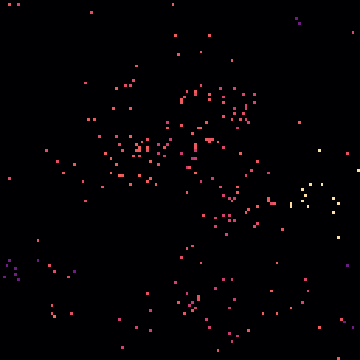
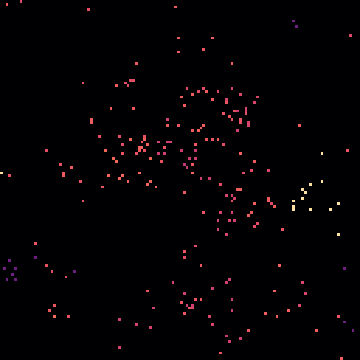
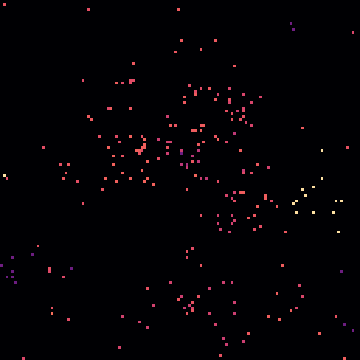
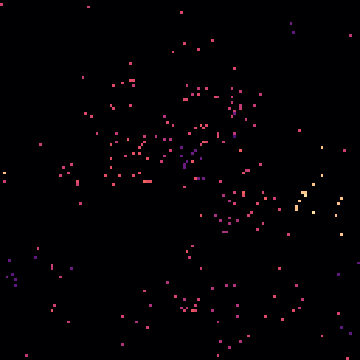
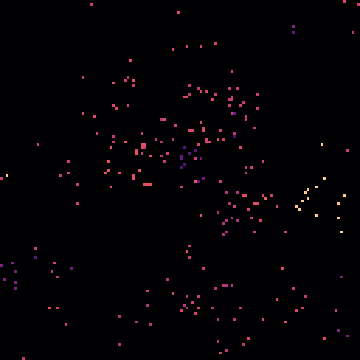
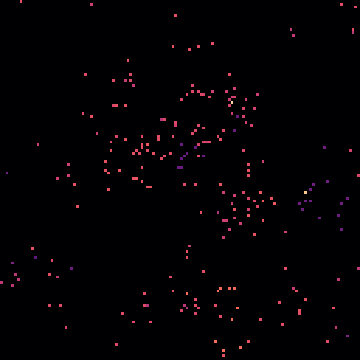
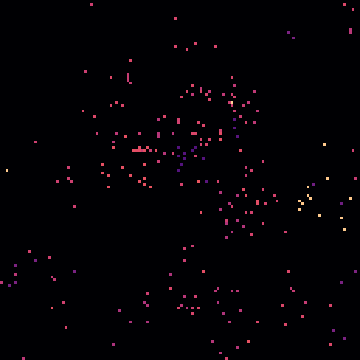
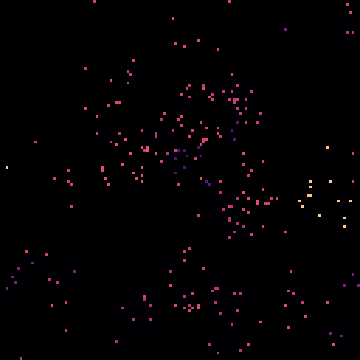
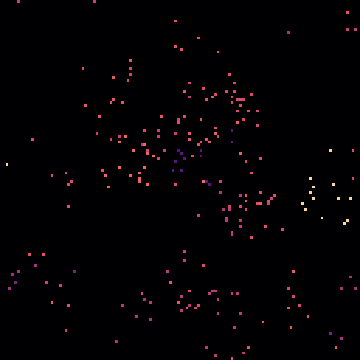
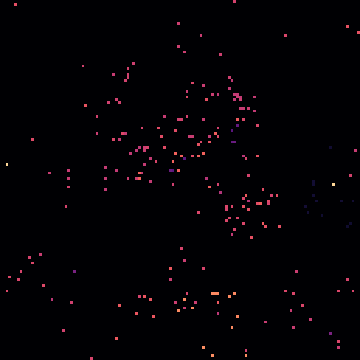
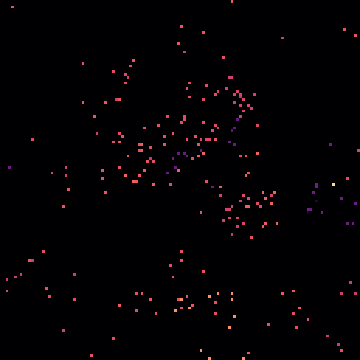
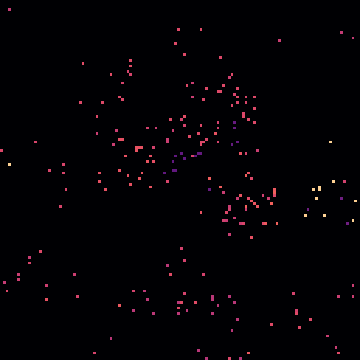
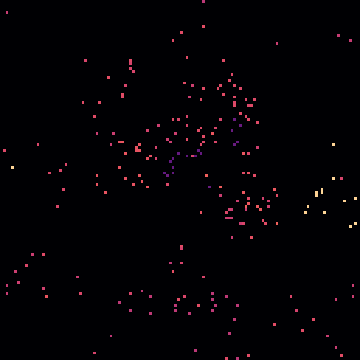
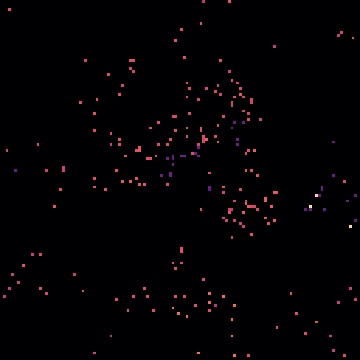
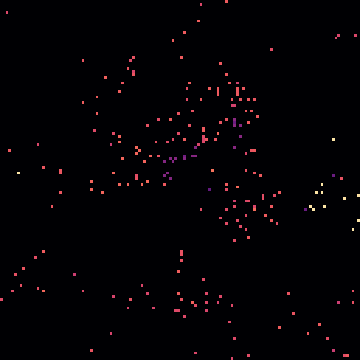
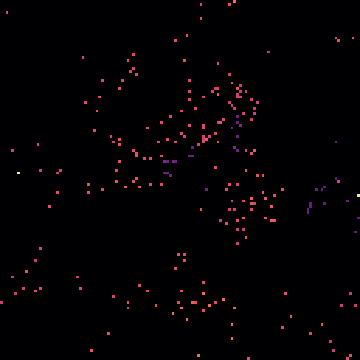
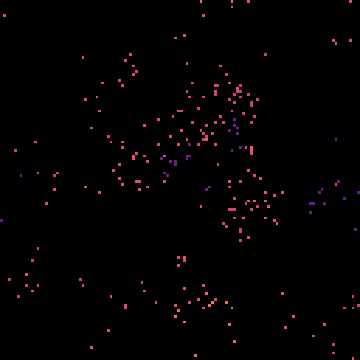
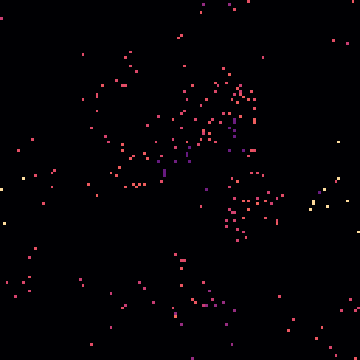
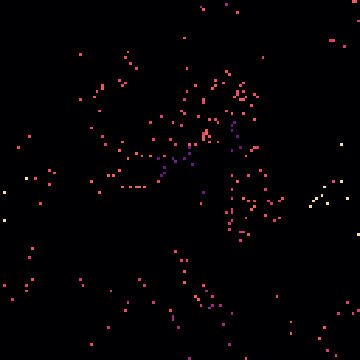
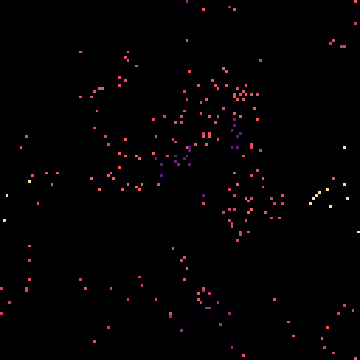
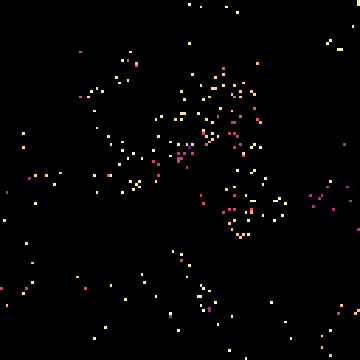
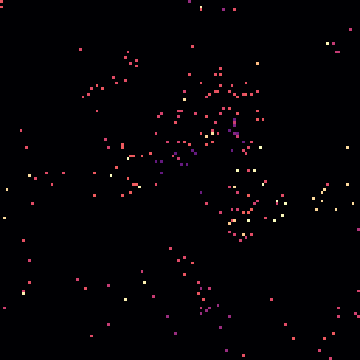
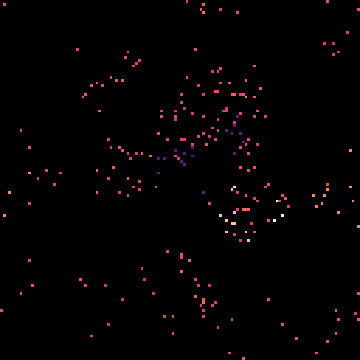
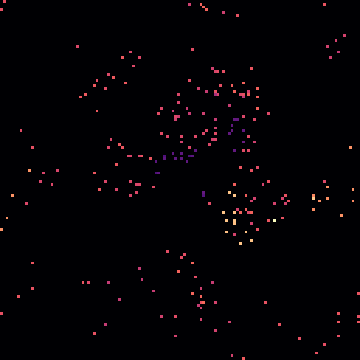
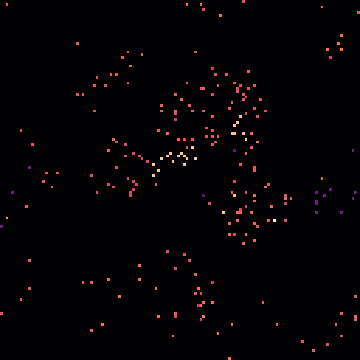
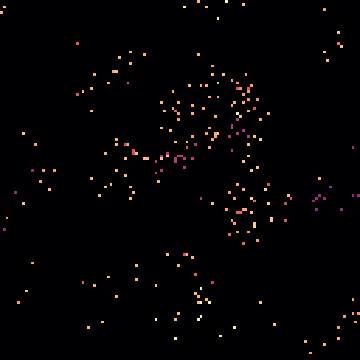
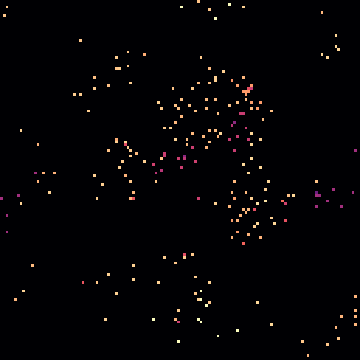
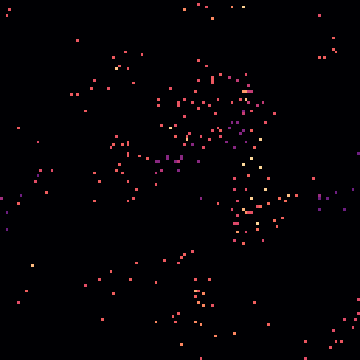
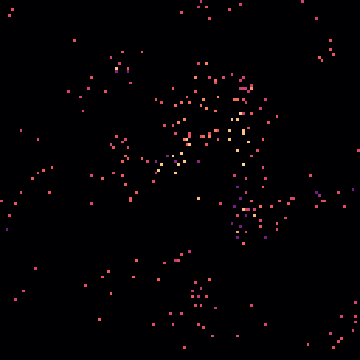
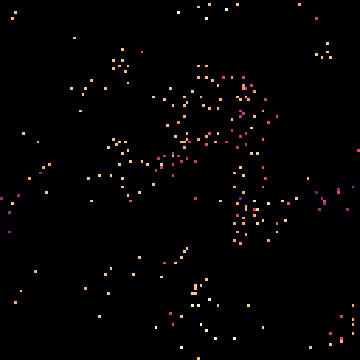
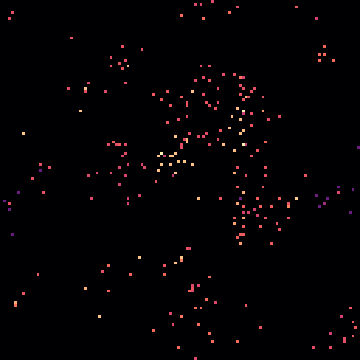
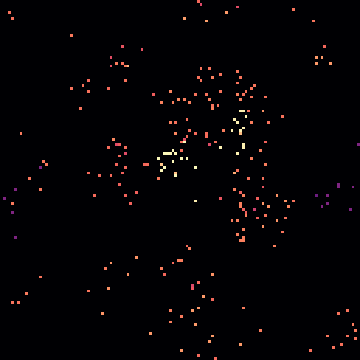
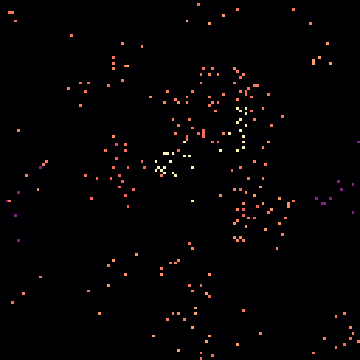
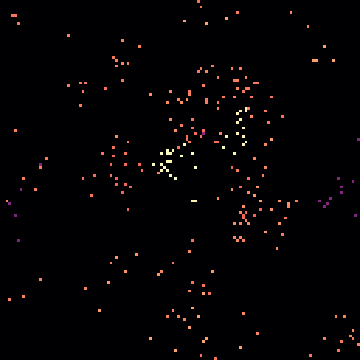
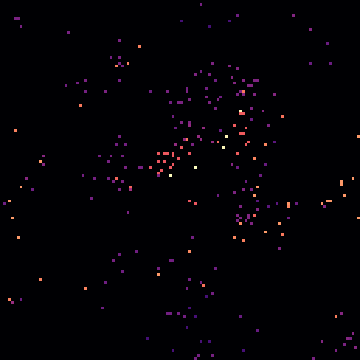
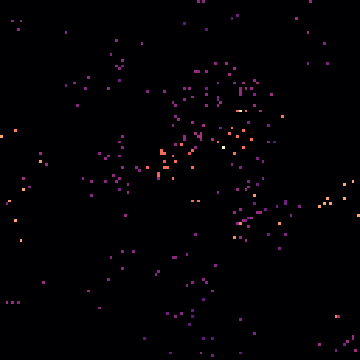
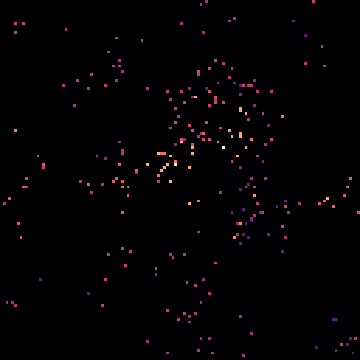
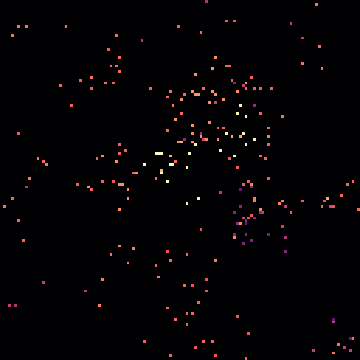
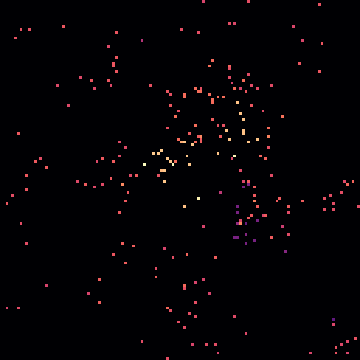
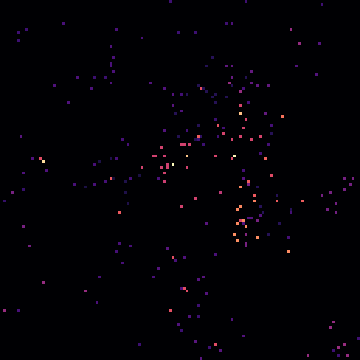
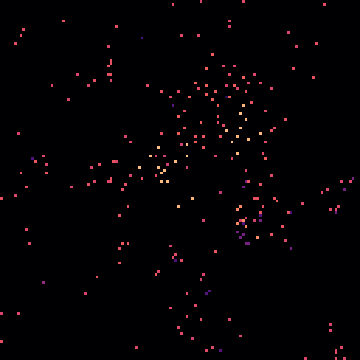
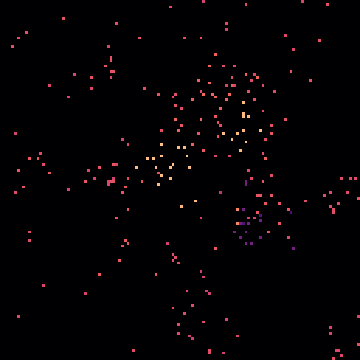
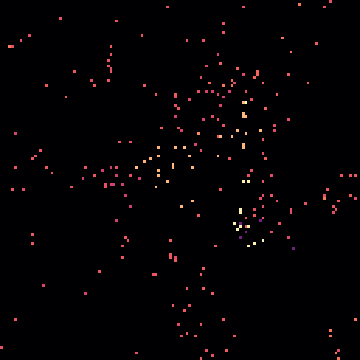
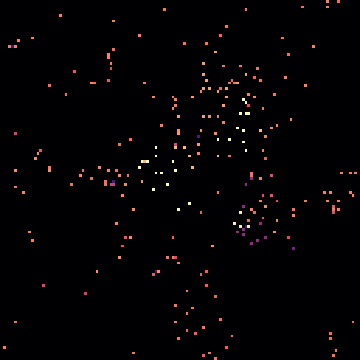
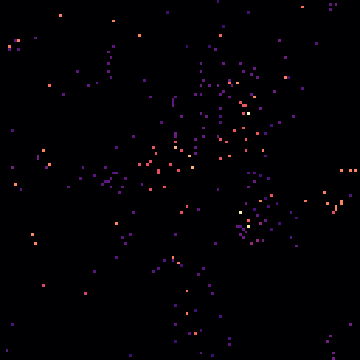
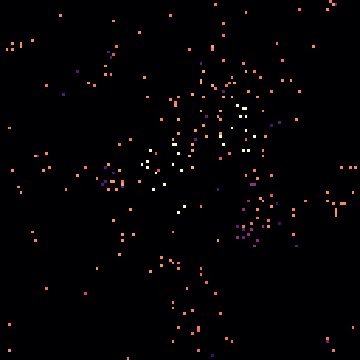
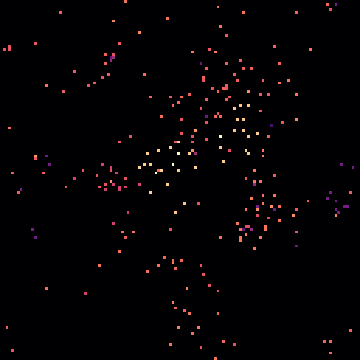
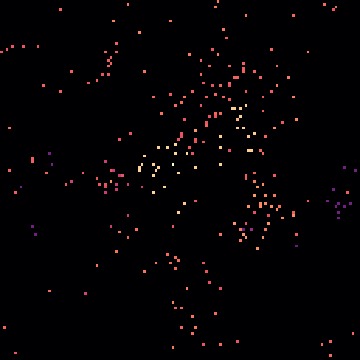
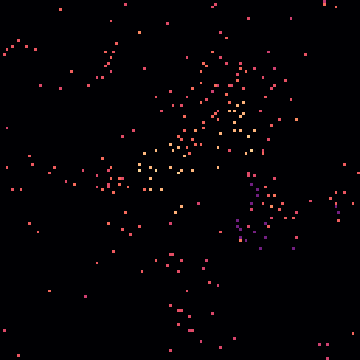
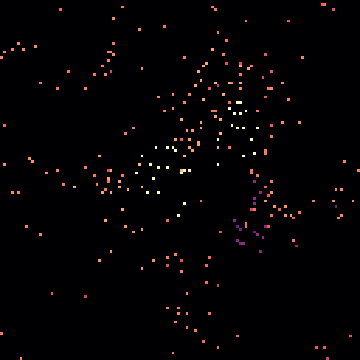
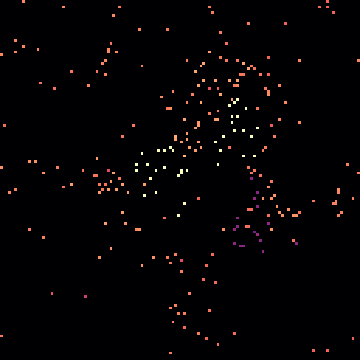
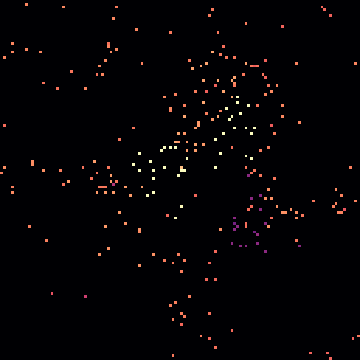
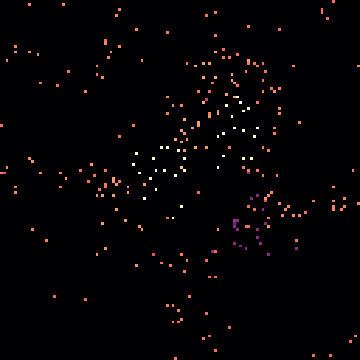
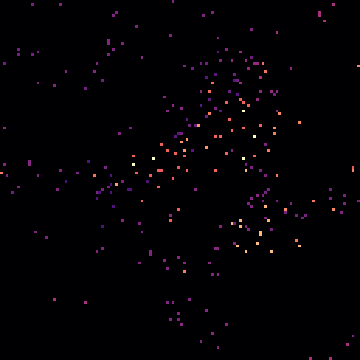
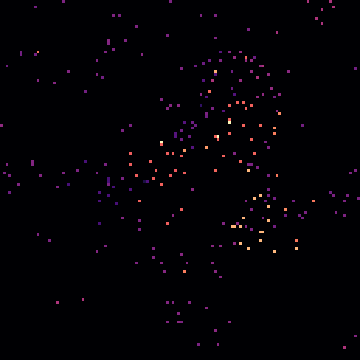
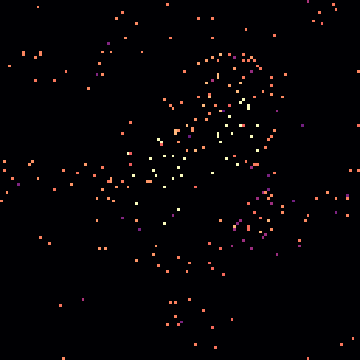
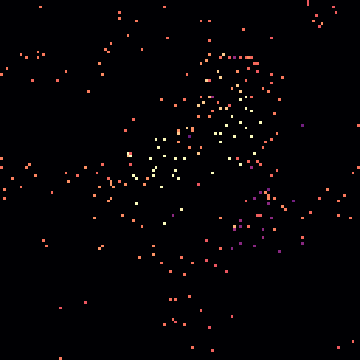
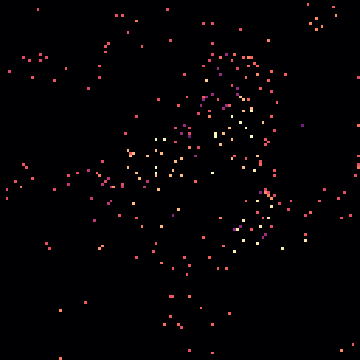
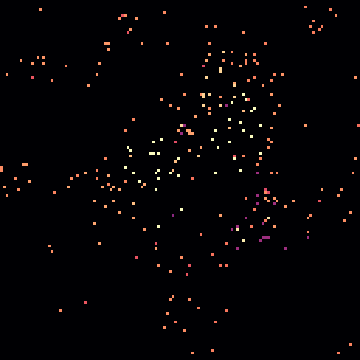
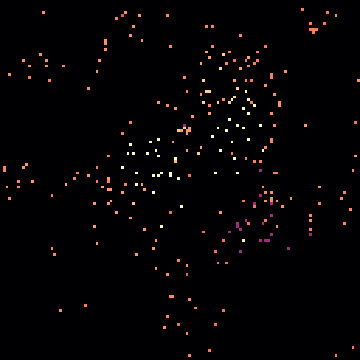
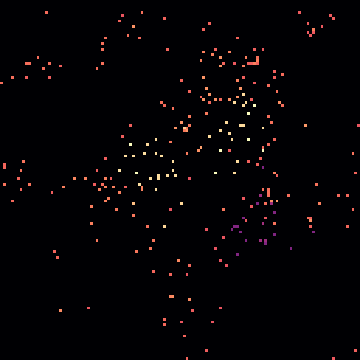
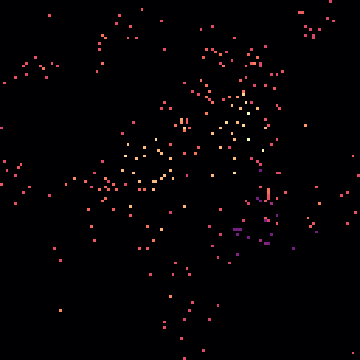
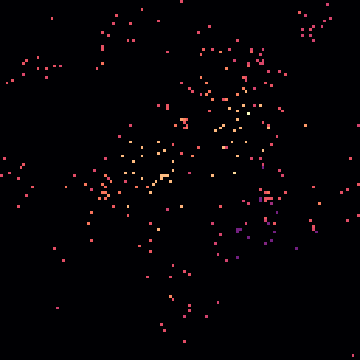
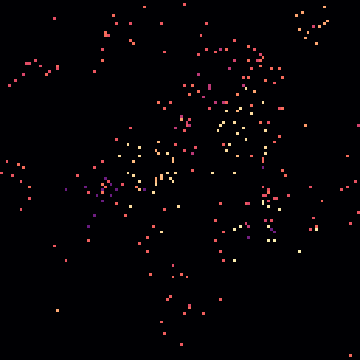
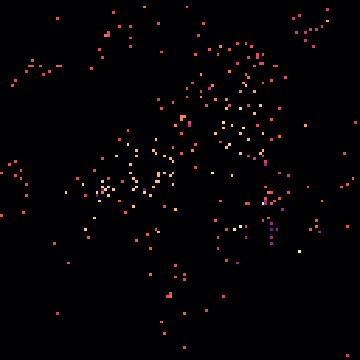
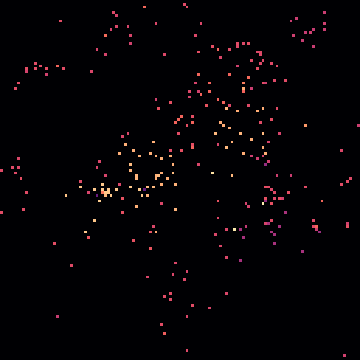
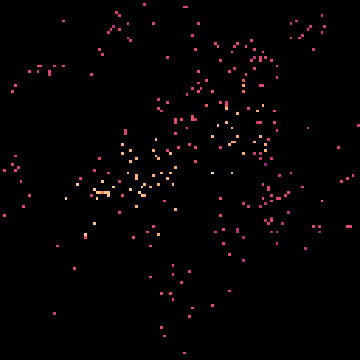
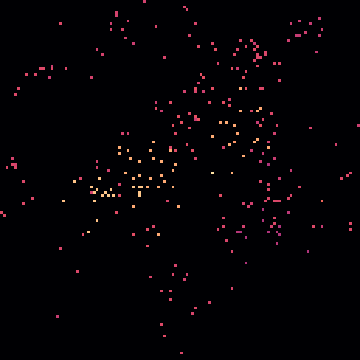
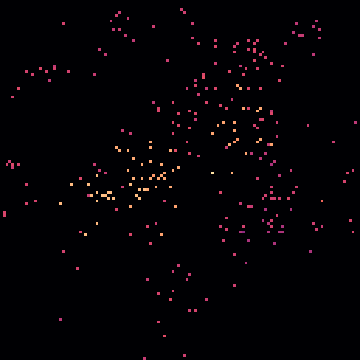
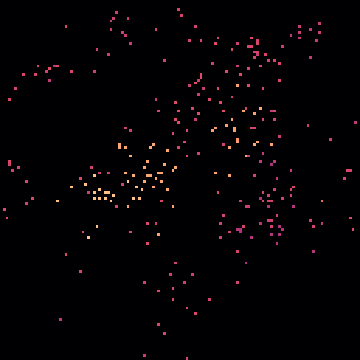
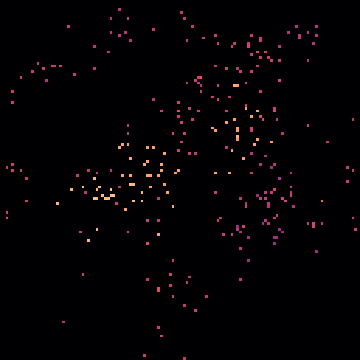
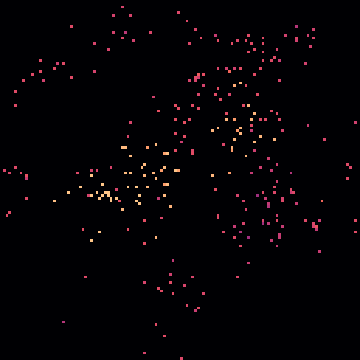
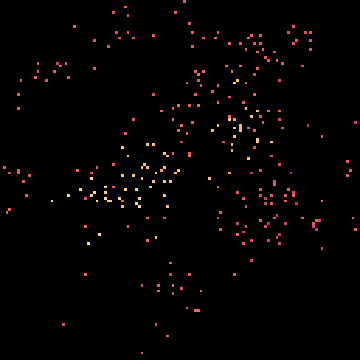
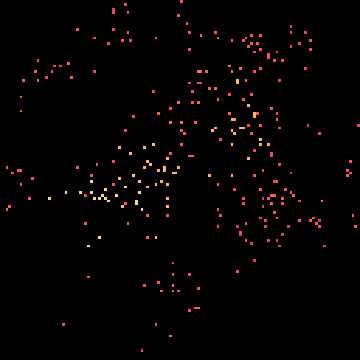
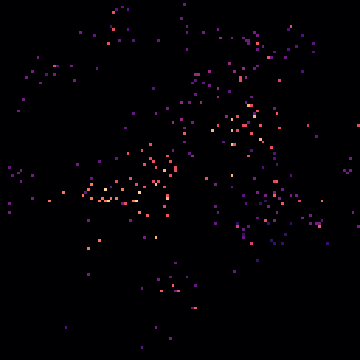
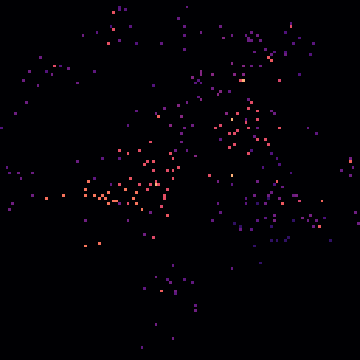
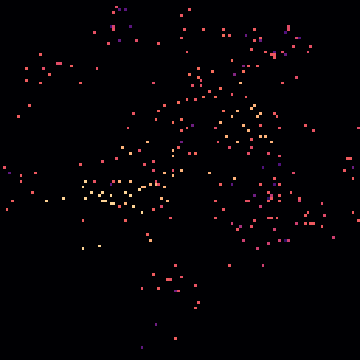
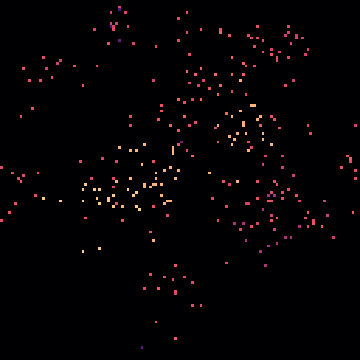
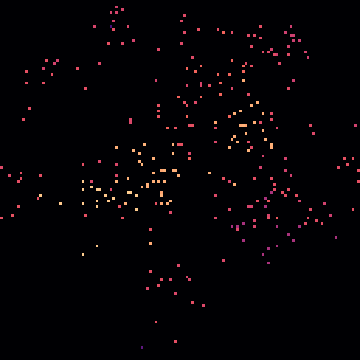
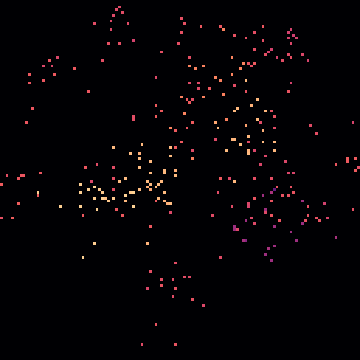
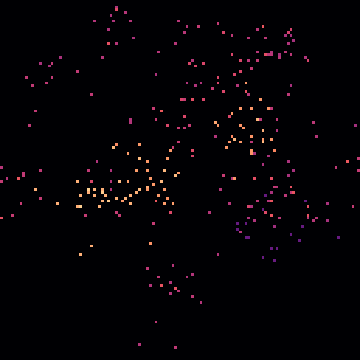
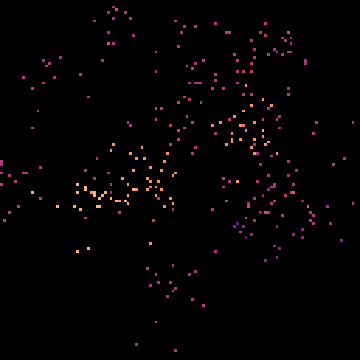
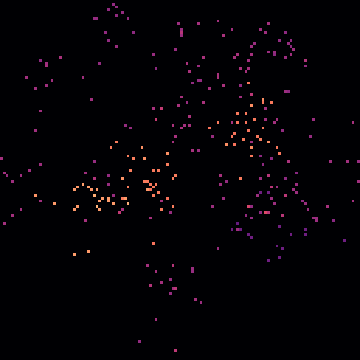

In [17]:
gr

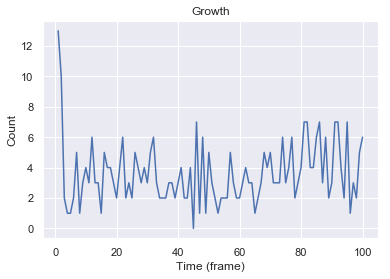

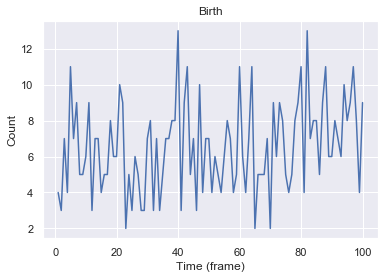

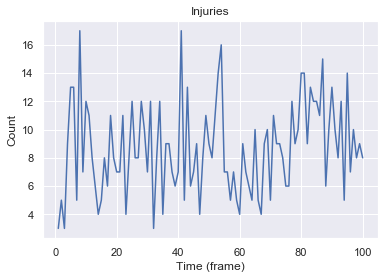

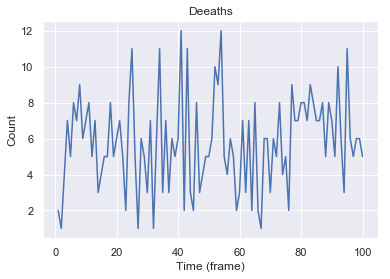

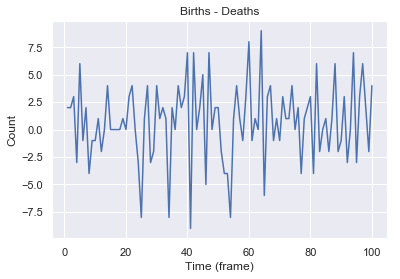

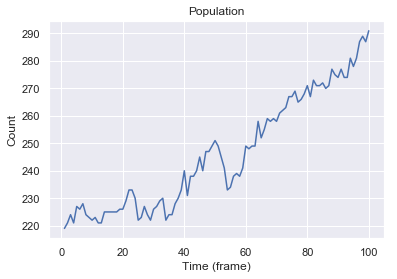

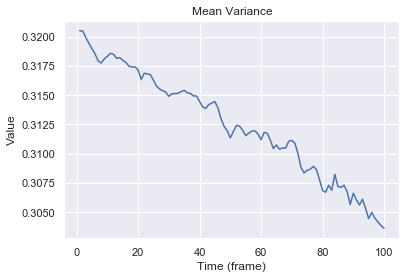

In [18]:
# Growth
plt.plot(t[:,0],t[:,1])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Growth')
plt.grid(True)
plt.show()

# Birth
plt.plot(t[:,0],t[:,2])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Birth')
plt.grid(True)
plt.show()

# Injuries
plt.plot(t[:,0],t[:,3])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Injuries')
plt.grid(True)
plt.show()

# Deaths
plt.plot(t[:,0],t[:,4])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Deeaths')
plt.grid(True)
plt.show()

# Births-Deaths
plt.plot(t[:,0],t[:,2]-t[:,4])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Births - Deaths')
plt.grid(True)
plt.show()

# Population
plt.plot(t[:,0],t[:,5])
plt.xlabel('Time (frame)')
plt.ylabel('Count')
plt.title('Population')
plt.grid(True)
plt.show()

# Mean Variance
plt.plot(t[:,0],t[:,6])
plt.xlabel('Time (frame)')
plt.ylabel('Value')
plt.title('Mean Variance')
plt.grid(True)
plt.show()

In [19]:
# Summary
t

array([[  1.        ,  13.        ,   4.        ,   3.        ,
          2.        , 219.        ,   0.32051413],
       [  2.        ,  10.        ,   3.        ,   5.        ,
          1.        , 221.        ,   0.32048581],
       [  3.        ,   2.        ,   7.        ,   3.        ,
          4.        , 224.        ,   0.3199324 ],
       [  4.        ,   1.        ,   4.        ,   9.        ,
          7.        , 221.        ,   0.31944094],
       [  5.        ,   1.        ,  11.        ,  13.        ,
          5.        , 227.        ,   0.3189815 ],
       [  6.        ,   2.        ,   7.        ,  13.        ,
          8.        , 226.        ,   0.31853778],
       [  7.        ,   5.        ,   9.        ,   5.        ,
          7.        , 228.        ,   0.31794013],
       [  8.        ,   1.        ,   5.        ,  17.        ,
          9.        , 224.        ,   0.31775382],
       [  9.        ,   3.        ,   5.        ,   7.        ,
          6.    

In [20]:
nx.info(g)

'Name: \nType: Graph\nNumber of nodes: 668\nNumber of edges: 654\nAverage degree:   1.9581'

In [21]:
#import dill
#dill.dump_session('notebook_env.db')

In [22]:
#import dill
#dill.load_session('notebook_env.db')

In [23]:
#for i in range(1):
#    output = sig_func(train_in,disc_weights)
#    disc_weights += np.dot(train_in.T,(train_out-output)*output*(1-output))

#test_in = animate.X[coords[0]-lookr:coords[0]+lookr+1,coords[1]-lookr:coords[1]+lookr+1].flatten()
#test_out = sig_func(test_in,disc_weights)
#train_in = np.vstack((train_in,test_in))

#animate.X = life_step(animate.X)
#outcome = animate.X[coords[0]-1:coords[0]+2,coords[1]-1:coords[1]+2].flatten()
#train_out = np.vstack((train_out,outcome))